# 1. TOPIC - Customer Segmentation using Clustering techniques
-   Customer Segmentation is essential for financial institutions and businesses to understand their customer's preferences, in order to tailor their services and marketing strategies to meet the needs of each group or segment of customers.
-   This improves customer statisfaction and retention which is critical for a stable and predictable revenue stream. Also existing customers can refer new customers contributing to the company's growth with reduced marketing costs.
-   This is an unsupervised machine learning approach widely used in segmentation tasks to improve marketing strategy and business value for companies.

## 2. Goal
-  To analyze customer data and divide them into clusters based on their similarity of purchasing patterns by using four clustering techniques such as  K-means(Centroid-based), Hierarchical(Connectivity-based), Gaussian mixture(Distribution-based) and DBSCAN (Density-Based). We will compare the performance of these four clustering algorithms.


## 3. Data
### The dataset is obtained from Kaggle https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
-  It contains 8950 records of active credit card customers with 18  behavioral variables (purchase frequency, credit limit, balance etc.)
-  Dataset column definition:
-  CUSTID: Credit Cardholder ID number (Categorical)
-  BALANCE: Balance amount left in the customer's account 
-  BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 
-  PURCHASES: Amount of purchases in dollars made from the account
-  ONEOFFPURCHASES: Maximum purchase amount done in one-go
-  INSTALLMENTSPURCHASES: Amount of purchase done in installment
-  CASH ADVANCE: Cash in advance done by the user
-  PURCHASESFREQUENCY: How frequently the Purchases are made, score between 0 and 1
-  ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go 
-  PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done
-  CASHADVANCEFREQUENCY: How frequently the cash in advance being paid(0 to 1)
-  CASHADVANCETRX: Number of Transactions made with Cash in Advance
-  PURCHASESTRX: Number of purchase transactions made
-  CREDIT LIMIT: Limit of Credit Card for user
-  PAYMENTS: Amount of Payment done by the user
-  MINIMUM_PAYMENTS: Minimum amount of payments made by the user
-  PRCFULLPAYMENT: Percent of full payment paid by the user
-  TENURE: Tenure years of credit card service for the user

## Import Libraries

In [83]:
# Install libraries
import numpy as np
import pandas as pd 
import string 
import re 

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#! pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# Scaling and dimension reduction
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [84]:
data = pd.read_csv('Credit_Card_Dataset.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [85]:
data.sample(10)

CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1291  C11336   4609.210475           1.000000     335.00            335.00   
3738  C13844    224.972360           1.000000    2084.64              0.00   
6830  C17018    553.534453           1.000000    1682.36           1440.14   
2529  C12603   1958.649839           0.857143    1759.46           1759.46   
3744  C13850   4283.519021           1.000000    8151.36           3092.07   
4498  C14623    653.881030           0.909091       0.00              0.00   
5913  C16079  13777.377720           1.000000       0.00              0.00   
8874  C19115    686.623746           1.000000     422.21            149.00   
4558  C14684   7934.946009           1.000000    1792.15           1792.15   
8088  C18307   1377.230621           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1291                    0.00      0.000000             0.166667   
3738                 2084.64      0.000000             1.000000   
6830                  242.22      0.000000             0.666667   
2529                    0.00   3240.789709             0.571429   
3744                 5059.29   2685.118122             0.833333   
4498                    0.00   1366.204137             0.000000   
5913                    0.00   1675.249576             0.000000   
8874                  273.21    729.332469             1.000000   
4558                    0.00   4169.060991             0.333333   
8088                    0.00   1064.960986             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1291                    0.166667                          0.000000   
3738                    0.000000                          1.000000   
6830                    0.333333                          0.416667   
2529                    0.571429                          0.000000   
3744                    0.416667                          0.583333   
4498                    0.000000                          0.000000   
5913                    0.000000                          0.000000   
8874                    0.333333                          0.833333   
4558                    0.333333                          0.000000   
8088                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1291                0.000000                 0              2        6000.0   
3738                0.000000                 0             67        8500.0   
6830                0.000000                 0             19        1900.0   
2529                0.857143                16             11        7000.0   
3744                0.250000                 5             48        9500.0   
4498                0.416667                 7              0        1400.0   
5913                0.666667                11              0       14500.0   
8874                0.166667                 2             11        1000.0   
4558                0.333333                 6             16       11500.0   
8088                0.250000                 4              0        2500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1291  6344.618447       1785.222397          0.083333      12  
3738  1658.927139        162.039102          0.916667      12  
6830   677.969663        195.776465          0.000000      12  
2529   226.879675        415.235431          0.000000       7  
3744  6839.916671       1409.012750          0.000000      12  
4498   205.709969        271.728487          0.000000      12  
5913  3054.844697       3242.471295          0.000000      12  
8874   416.560172         82.401461          0.000000       6  
4558  2373.896899       2184.394699          0.000000      12  
8088   343.961283        428.134666          0.000000      12

## 4. Data Description

In [86]:
# Dimensions- size of the data
print(data.shape)

# dataframe.ndim
df_ndim = data.ndim
print(df_ndim)

(8950, 18)
2


In [87]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [88]:
# Descriptive Statistics gives summary of each attribute in the dataset
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [89]:
# Unique values in each column
print(list(data['TENURE'].unique()))
print(data['TENURE'].value_counts())

[12, 8, 11, 9, 10, 7, 6]
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


### Discussions
-  The data has numerical values. Only the TENURE column has categorical numbers. Most of the customers are having credit card for 12 years. There are some missing values identified from the above descriptive statitics table and we will handle them in the next step.

## 5. Data Cleaning
-  Important step to ensure high quality data to improve data analysis and decision making.

In [90]:
# Checking for missing data
data.isna().sum()

# Checking for null values
#data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

-  Features CREDIT_LIMIT has 1 and MINIMUM_PAYMENTS has 313 missing vlaues. We can impute the missing values with either mean or median value of that particular column. In this case, I chose to fill in with median value.

In [91]:
# replacing missing values with median of that column 
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [92]:
# Rechecking the data for null values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [93]:
# Checking for duplicates
data.duplicated().sum()

0

-  The data is checked and handled for missing values and duplicates.There are no duplicates in the dataset.

In [94]:
# Ignoring the first column CUST_ID for data analysis
data1 = data.iloc[:, 1:18]
print(data1.shape)
data1.head()

(8950, 17)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

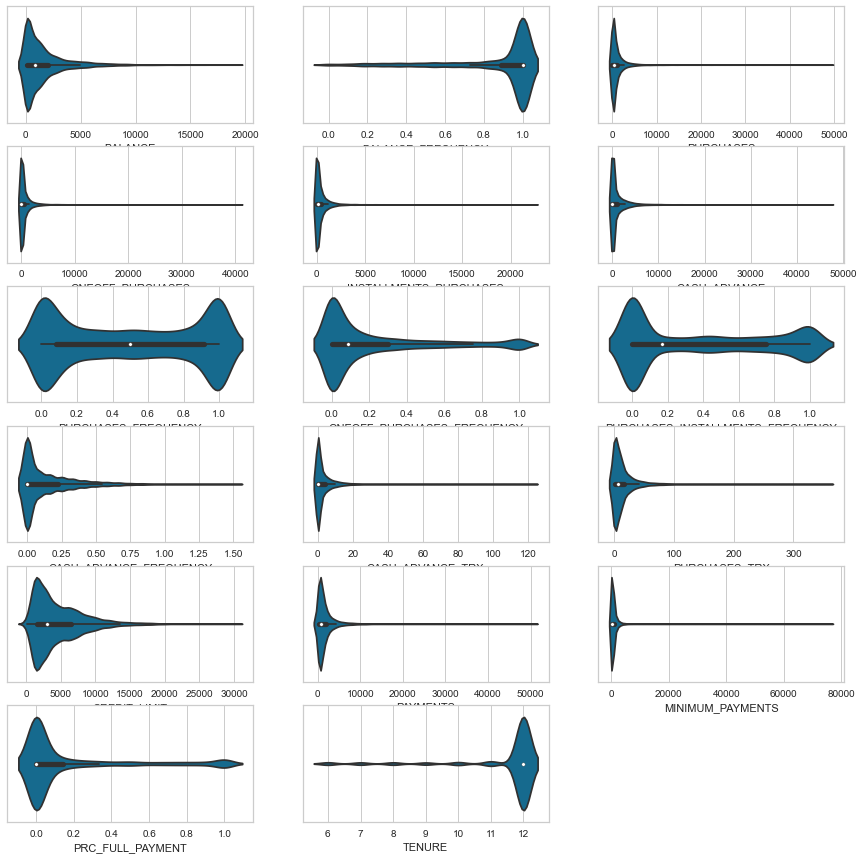

In [95]:
# Violinplot to depict summary statistics and the density of each variable.
fig =plt.figure(figsize =(15,15))

for c in range(len(data1.columns)):
    fig.add_subplot(6,3, c+1)
    sns.violinplot(x = data1.iloc[:,c], inner='box',points ='all', fill=False)
plt.show()

- The white dot in each of the violin plots is the median value of that variable. The shape of the distribution indicates the records are highly concentrated aroung the median for all the variables except PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY.

<AxesSubplot:>

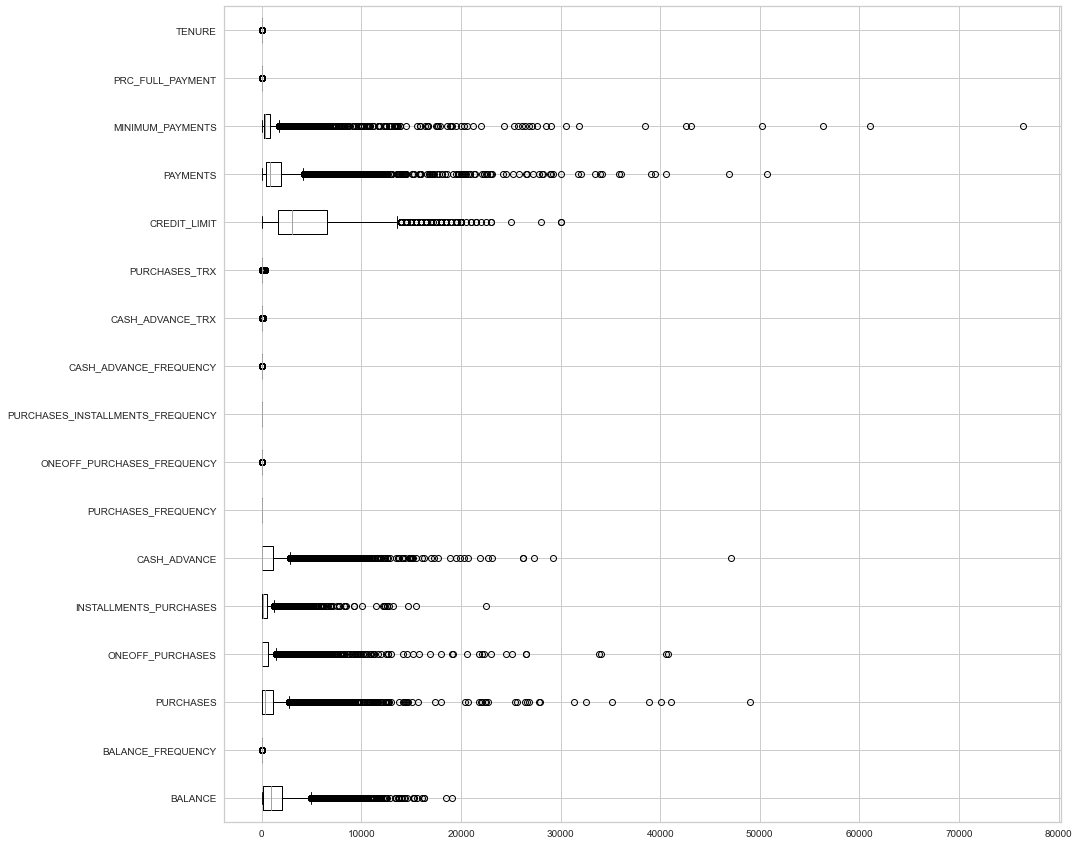

In [96]:
# Boxplot for visualizing the distribution of data and to check for outliers.
# ALL in ONE PLOT
plt.figure(figsize = (15,15))
data1.boxplot(vert=False)

### Discussions
-  The dataset have numerous outliers. By dropping them we can lose useful information. Hence we will transform the data using Normalizer.

## 6. Exploratory Data Analysis

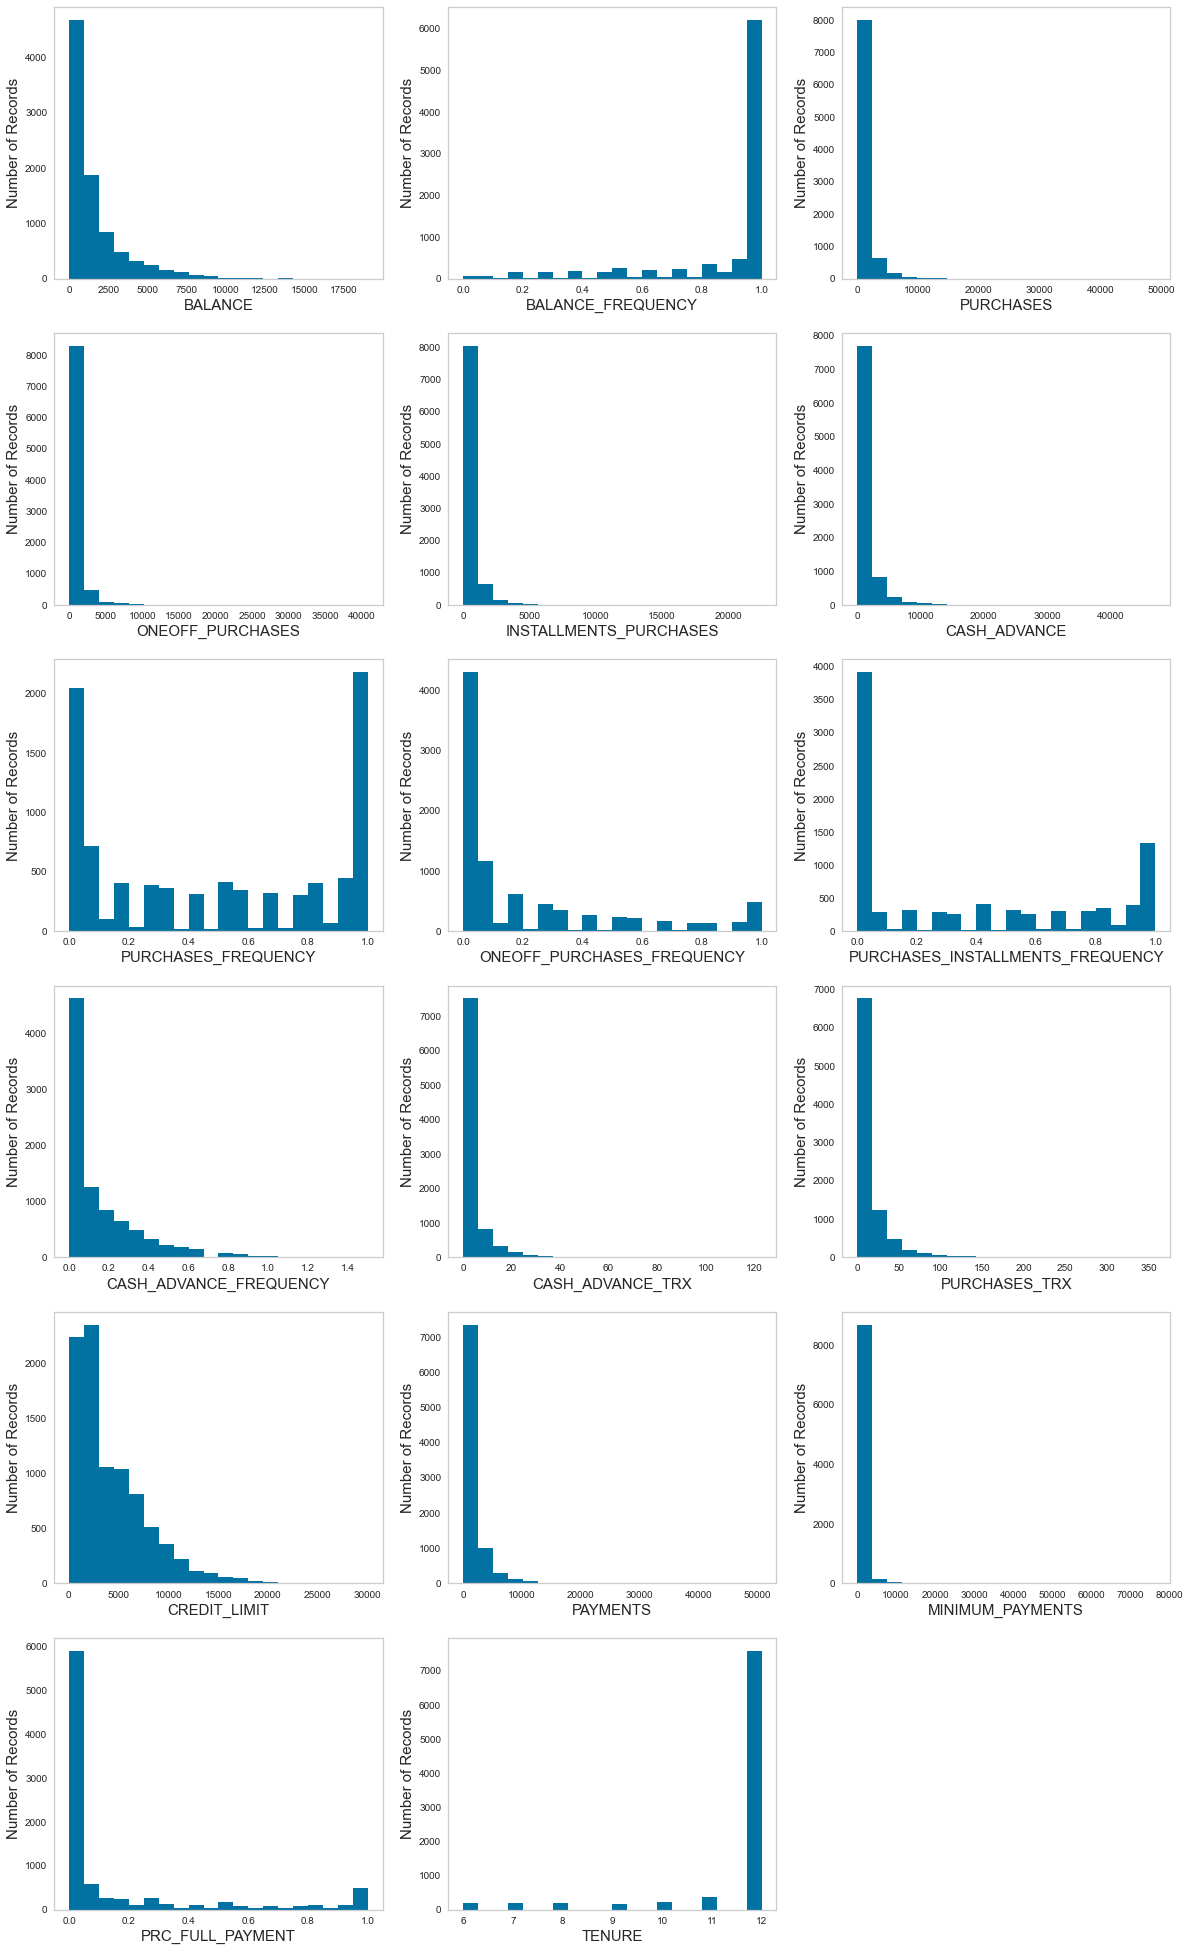

In [97]:
# Histograms to check for normality in the data
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(data1.columns):
    ax = plt.subplot(6, 3, i+1)
    plt.hist(data1[col], bins=20)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Number of Records", fontsize = 15)
    plt.grid()

-  By looking at the histograms, we can tell that the variables in the dataset does not follow normal distribution.
-  Most of the customers have low balance, low purchases amount, low credit limit etc. Overall the data is skewed.

In [98]:
# Statistical test to confirm that data does not follow noraml distribution.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
import math
from scipy.stats import shapiro 
for c in data1.columns:
    print(c,"=",shapiro(data1[c]))

BALANCE = ShapiroResult(statistic=0.73087477684021, pvalue=0.0)
BALANCE_FREQUENCY = ShapiroResult(statistic=0.5900315642356873, pvalue=0.0)
PURCHASES = ShapiroResult(statistic=0.43718016147613525, pvalue=0.0)
ONEOFF_PURCHASES = ShapiroResult(statistic=0.34988850355148315, pvalue=0.0)
INSTALLMENTS_PURCHASES = ShapiroResult(statistic=0.45845019817352295, pvalue=0.0)
CASH_ADVANCE = ShapiroResult(statistic=0.5127322673797607, pvalue=0.0)
PURCHASES_FREQUENCY = ShapiroResult(statistic=0.8404586315155029, pvalue=0.0)
ONEOFF_PURCHASES_FREQUENCY = ShapiroResult(statistic=0.7098355293273926, pvalue=0.0)
PURCHASES_INSTALLMENTS_FREQUENCY = ShapiroResult(statistic=0.7899594902992249, pvalue=0.0)
CASH_ADVANCE_FREQUENCY = ShapiroResult(statistic=0.7226073741912842, pvalue=0.0)
CASH_ADVANCE_TRX = ShapiroResult(statistic=0.5071721076965332, pvalue=0.0)
PURCHASES_TRX = ShapiroResult(statistic=0.57440185546875, pvalue=0.0)
CREDIT_LIMIT = ShapiroResult(statistic=0.8535257577896118, pvalue=0.0)
PAYMENTS = 

-  Low p-values suggest non-normal distribution.

In [99]:
# Correlation
data1.corr().round(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                              1.00               0.32       0.18   
BALANCE_FREQUENCY                    0.32               1.00       0.13   
PURCHASES                            0.18               0.13       1.00   
ONEOFF_PURCHASES                     0.16               0.10       0.92   
INSTALLMENTS_PURCHASES               0.13               0.12       0.68   
CASH_ADVANCE                         0.50               0.10      -0.05   
PURCHASES_FREQUENCY                 -0.08               0.23       0.39   
ONEOFF_PURCHASES_FREQUENCY           0.07               0.20       0.50   
PURCHASES_INSTALLMENTS_FREQUENCY    -0.06               0.18       0.32   
CASH_ADVANCE_FREQUENCY               0.45               0.19      -0.12   
CASH_ADVANCE_TRX                     0.39               0.14      -0.07   
PURCHASES_TRX                        0.15               0.19       0.69   
CREDIT_LIMIT                         0.53               0.10       0.36   
PAYMENTS                             0.32               0.07       0.60   
MINIMUM_PAYMENTS                     0.40               0.13       0.10   
PRC_FULL_PAYMENT                    -0.32              -0.10       0.18   
TENURE                               0.07               0.12       0.09   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                       0.16                    0.13   
BALANCE_FREQUENCY                             0.10                    0.12   
PURCHASES                                     0.92                    0.68   
ONEOFF_PURCHASES                              1.00                    0.33   
INSTALLMENTS_PURCHASES                        0.33                    1.00   
CASH_ADVANCE                                 -0.03                   -0.06   
PURCHASES_FREQUENCY                           0.26                    0.44   
ONEOFF_PURCHASES_FREQUENCY                    0.52                    0.21   
PURCHASES_INSTALLMENTS_FREQUENCY              0.13                    0.51   
CASH_ADVANCE_FREQUENCY                       -0.08                   -0.13   
CASH_ADVANCE_TRX                             -0.05                   -0.07   
PURCHASES_TRX                                 0.55                    0.63   
CREDIT_LIMIT                                  0.32                    0.26   
PAYMENTS                                      0.57                    0.38   
MINIMUM_PAYMENTS                              0.05                    0.13   
PRC_FULL_PAYMENT                              0.13                    0.18   
TENURE                                        0.06                    0.09   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                                   0.50                -0.08   
BALANCE_FREQUENCY                         0.10                 0.23   
PURCHASES                                -0.05                 0.39   
ONEOFF_PURCHASES                         -0.03                 0.26   
INSTALLMENTS_PURCHASES                   -0.06                 0.44   
CASH_ADVANCE                              1.00                -0.22   
PURCHASES_FREQUENCY                      -0.22                 1.00   
ONEOFF_PURCHASES_FREQUENCY               -0.09                 0.50   
PURCHASES_INSTALLMENTS_FREQUENCY         -0.18                 0.86   
CASH_ADVANCE_FREQUENCY                    0.63                -0.31   
CASH_ADVANCE_TRX                          0.66                -0.20   
PURCHASES_TRX                            -0.08                 0.57   
CREDIT_LIMIT                              0.30                 0.12   
PAYMENTS                                  0.45                 0.10   
MINIMUM_PAYMENTS                          0.14                 0.01   
PRC_FULL_PAYMENT                         -0.15                 0.31   
TENURE                                   -0.07                 0.06   


In [100]:
# Get most correlated pairs
# your code here
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=20):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations Pairs:\n")
print(round(get_top_abs_correlations(data1,5),2))

Top Absolute Correlations Pairs:

PURCHASES               ONEOFF_PURCHASES                    0.92
PURCHASES_FREQUENCY     PURCHASES_INSTALLMENTS_FREQUENCY    0.86
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX                    0.80
PURCHASES               PURCHASES_TRX                       0.69
                        INSTALLMENTS_PURCHASES              0.68
dtype: float64


Text(0, 0.5, 'PURCHASES')

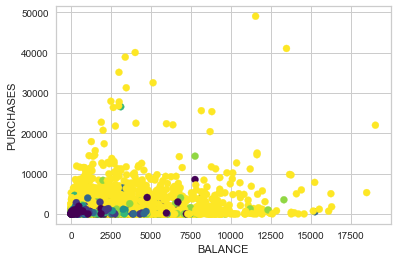

In [101]:
plt.scatter('BALANCE', 'PURCHASES' , c = 'TENURE', cmap='viridis', data= data1 )
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

<Figure size 576x396 with 0 Axes>

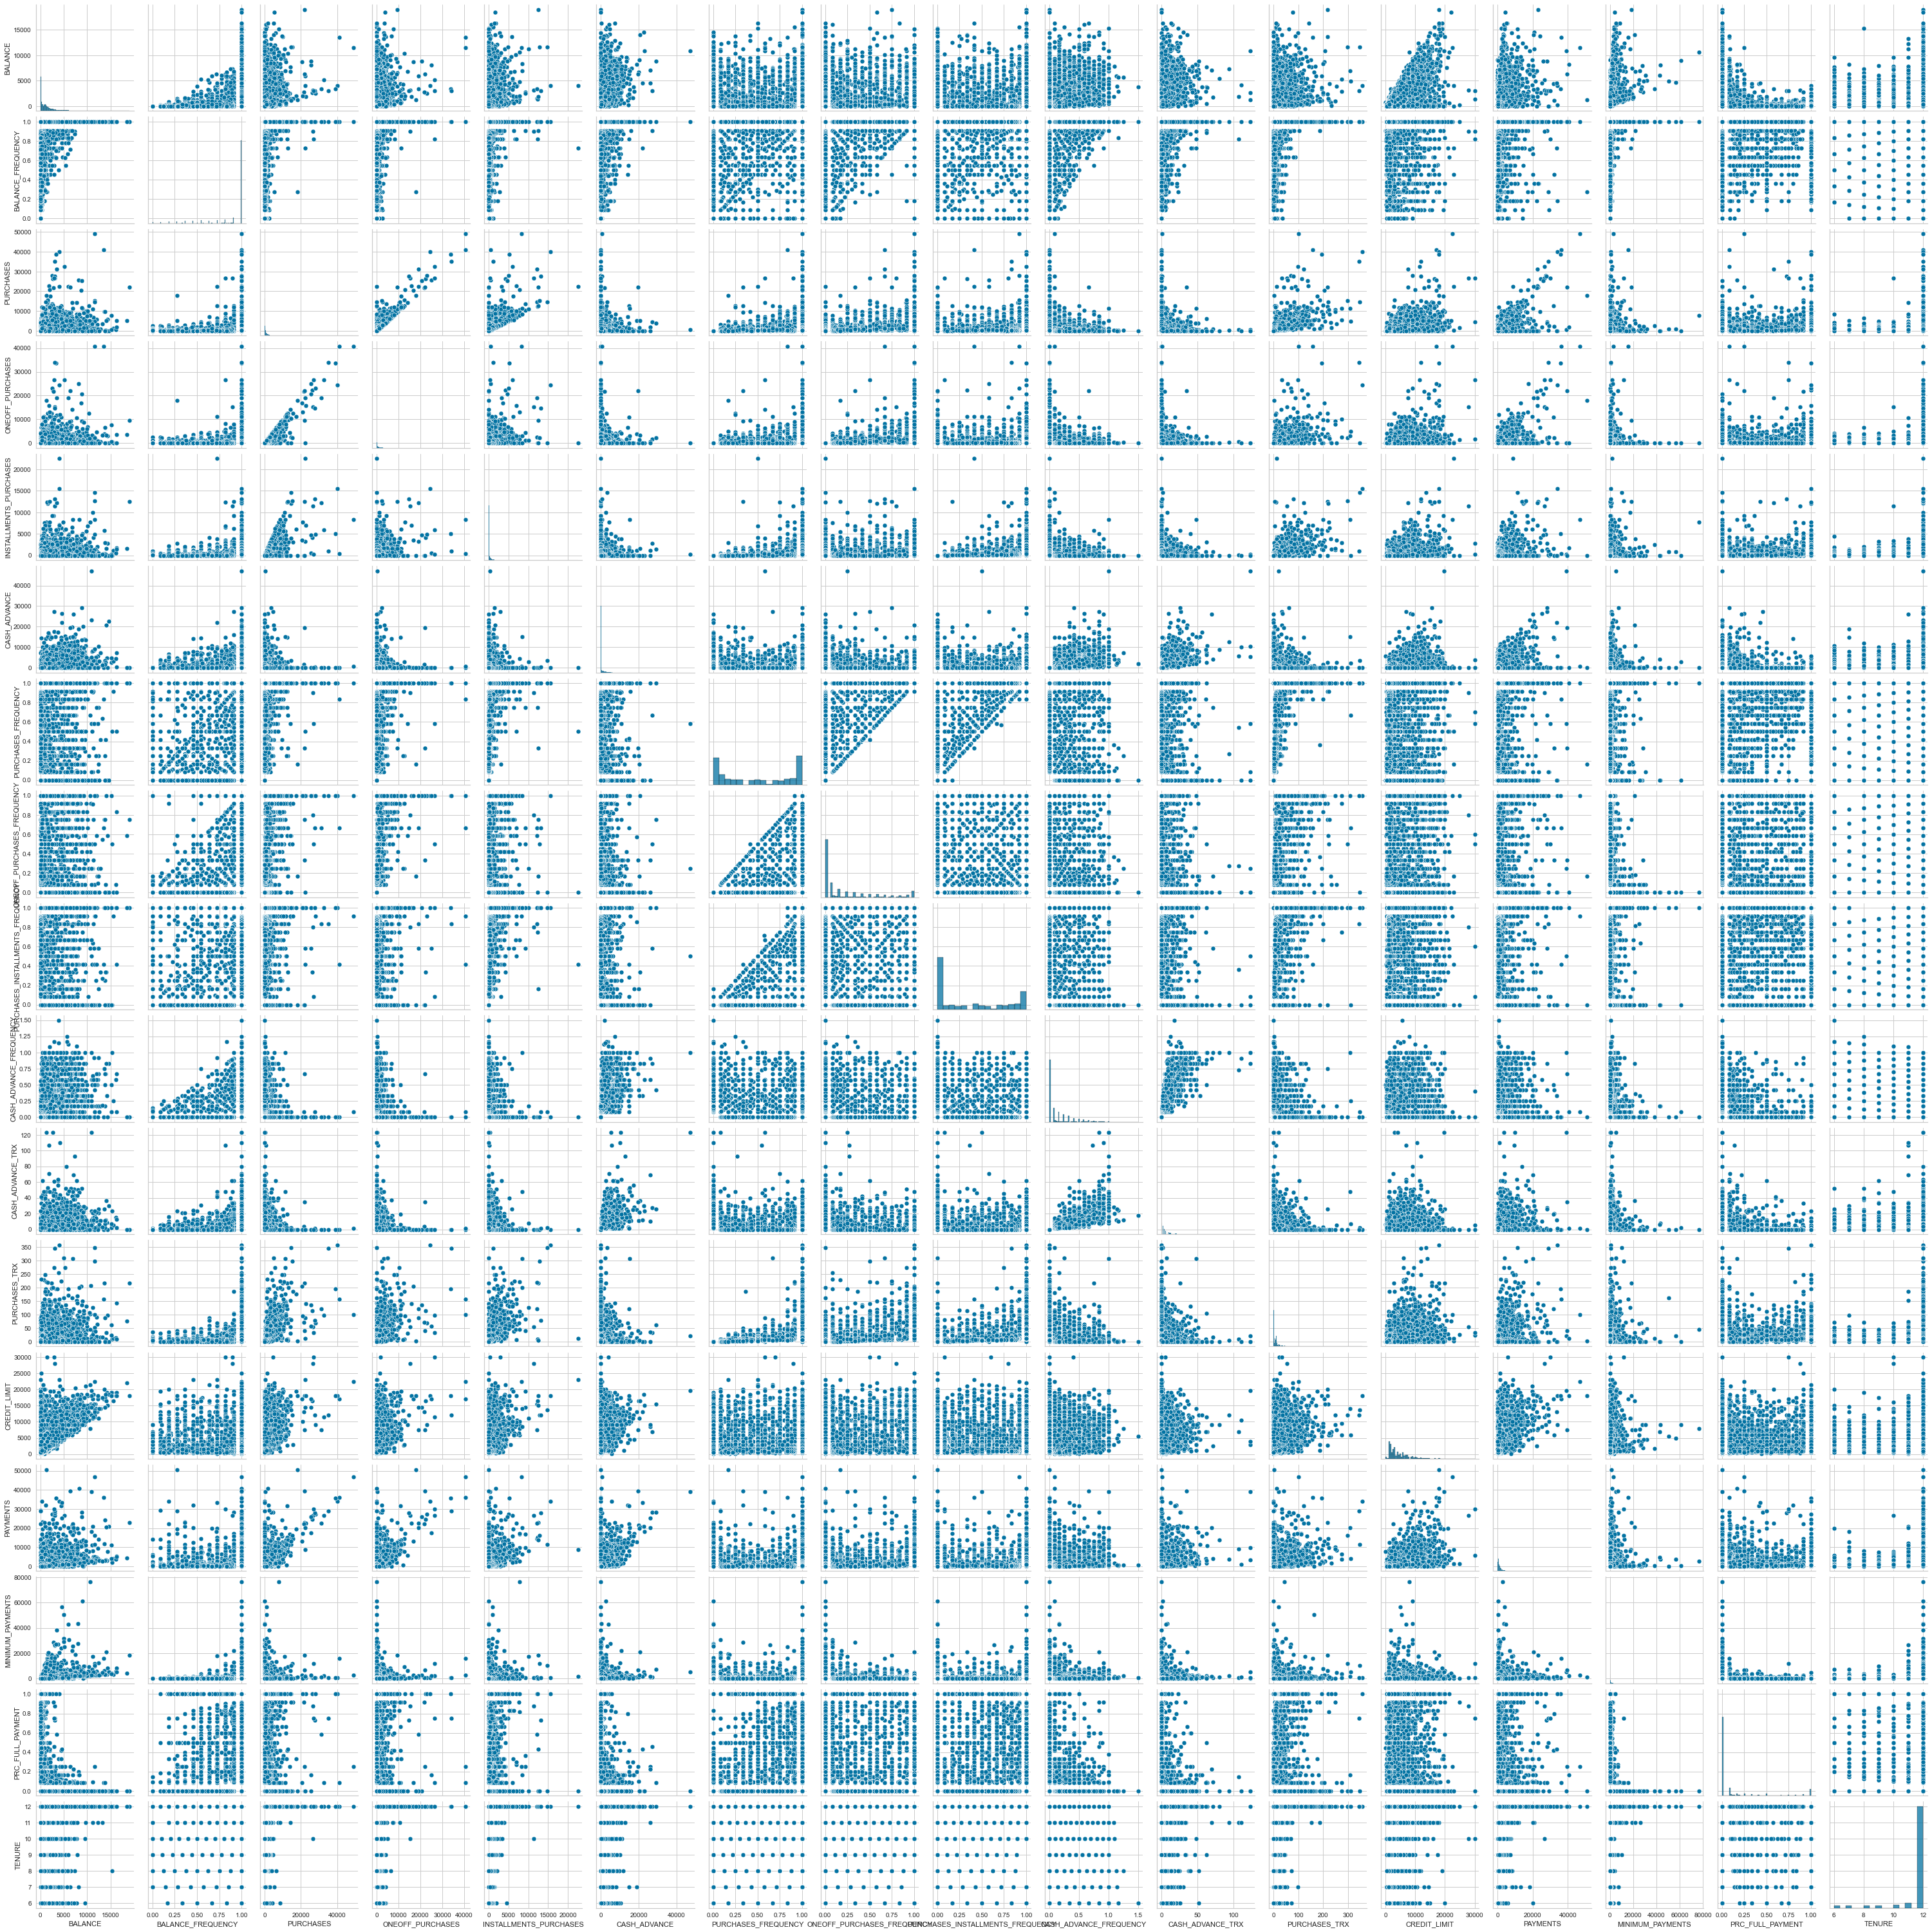

In [20]:
# PairPlot for whole dataset
plt.figure()
sns.pairplot(data1)
plt.show()

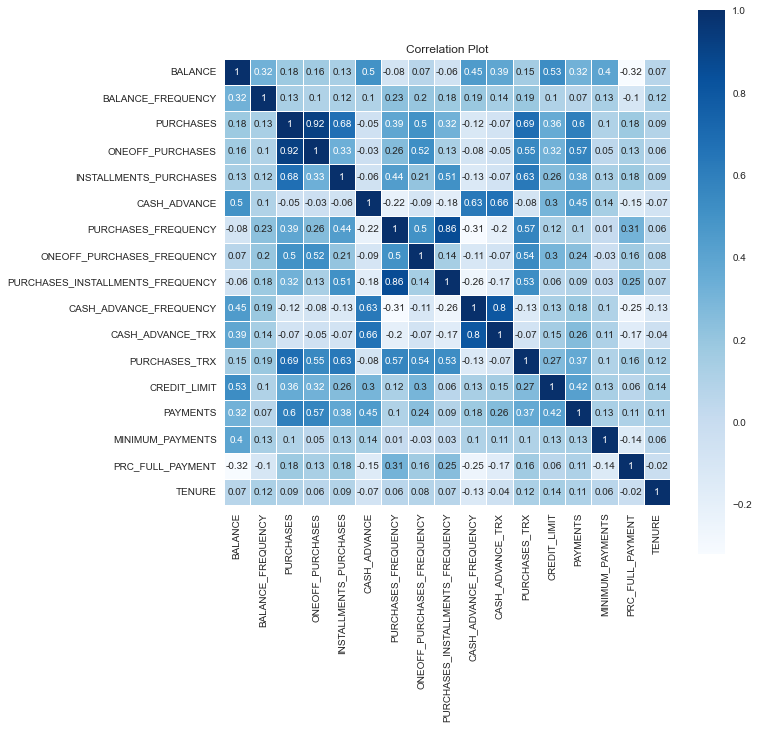

In [102]:
# Visualizing the correlation matrix using heatmap
plt.figure(figsize=(10,10))
corr = data1.corr().round(2)
sns.heatmap(corr, cmap='Blues', square = True, annot=True , linewidths = 0.5)
plt.title('Correlation Plot')
plt.show()

### Discussions
-  There are some high correlations between few pairs of data variables which indicates multicollinearity. 
-  We will use a dimensionality reduction technique such as PCA(Principal Component Analysis) to reduce the number of vairiables by combining highly correlated variables into a set of uncorrelated variables.

### Scale the Data
-  We will use Sklearns Normalizer functions to scale down the data.
-  Normalization involves scaling data values in a range between (0 to 1) or (-1 to 1) and is best for unknown or non-normal distributions. Here our data does not follow normal distribution. So Normalizing is the best choice to scale the data.

In [103]:
# Normalizer
normalizer = Normalizer()
#cols = data1.columns.tolist()
norm_data = normalizer.fit_transform(data1)
norm_df = pd.DataFrame(data = norm_data, columns = data1.columns)
norm_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.039353           0.000787   0.091790          0.000000   
1  0.293876           0.000083   0.000000          0.000000   
2  0.310798           0.000125   0.096307          0.096307   
3  0.208886           0.000080   0.187872          0.187872   
4  0.504284           0.000617   0.009867          0.009867   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.09179      0.000000             0.000160   
1                 0.00000      0.591240             0.000000   
2                 0.00000      0.000000             0.000125   
3                 0.00000      0.025792             0.000010   
4                 0.00000      0.000000             0.000051   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                           0.00008   
1                    0.000000                           0.00000   
2                    0.000125                           0.00000   
3                    0.000010                           0.00000   
4                    0.000051                           0.00000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       0.001924      0.962156   
1                0.000023          0.000367       0.000000      0.642358   
2                0.000000          0.000000       0.001495      0.934206   
3                0.000010          0.000125       0.000125      0.939987   
4                0.000000          0.000000       0.000617      0.740040   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  0.194165          0.134230           0.00000  0.011546  
1  0.376516          0.098404           0.00002  0.001101  
2  0.077485          0.078135           0.00000  0.001495  
3  0.000000          0.039147           0.00000  0.001504  
4  0.418329          0.150963           0.00000  0.007400

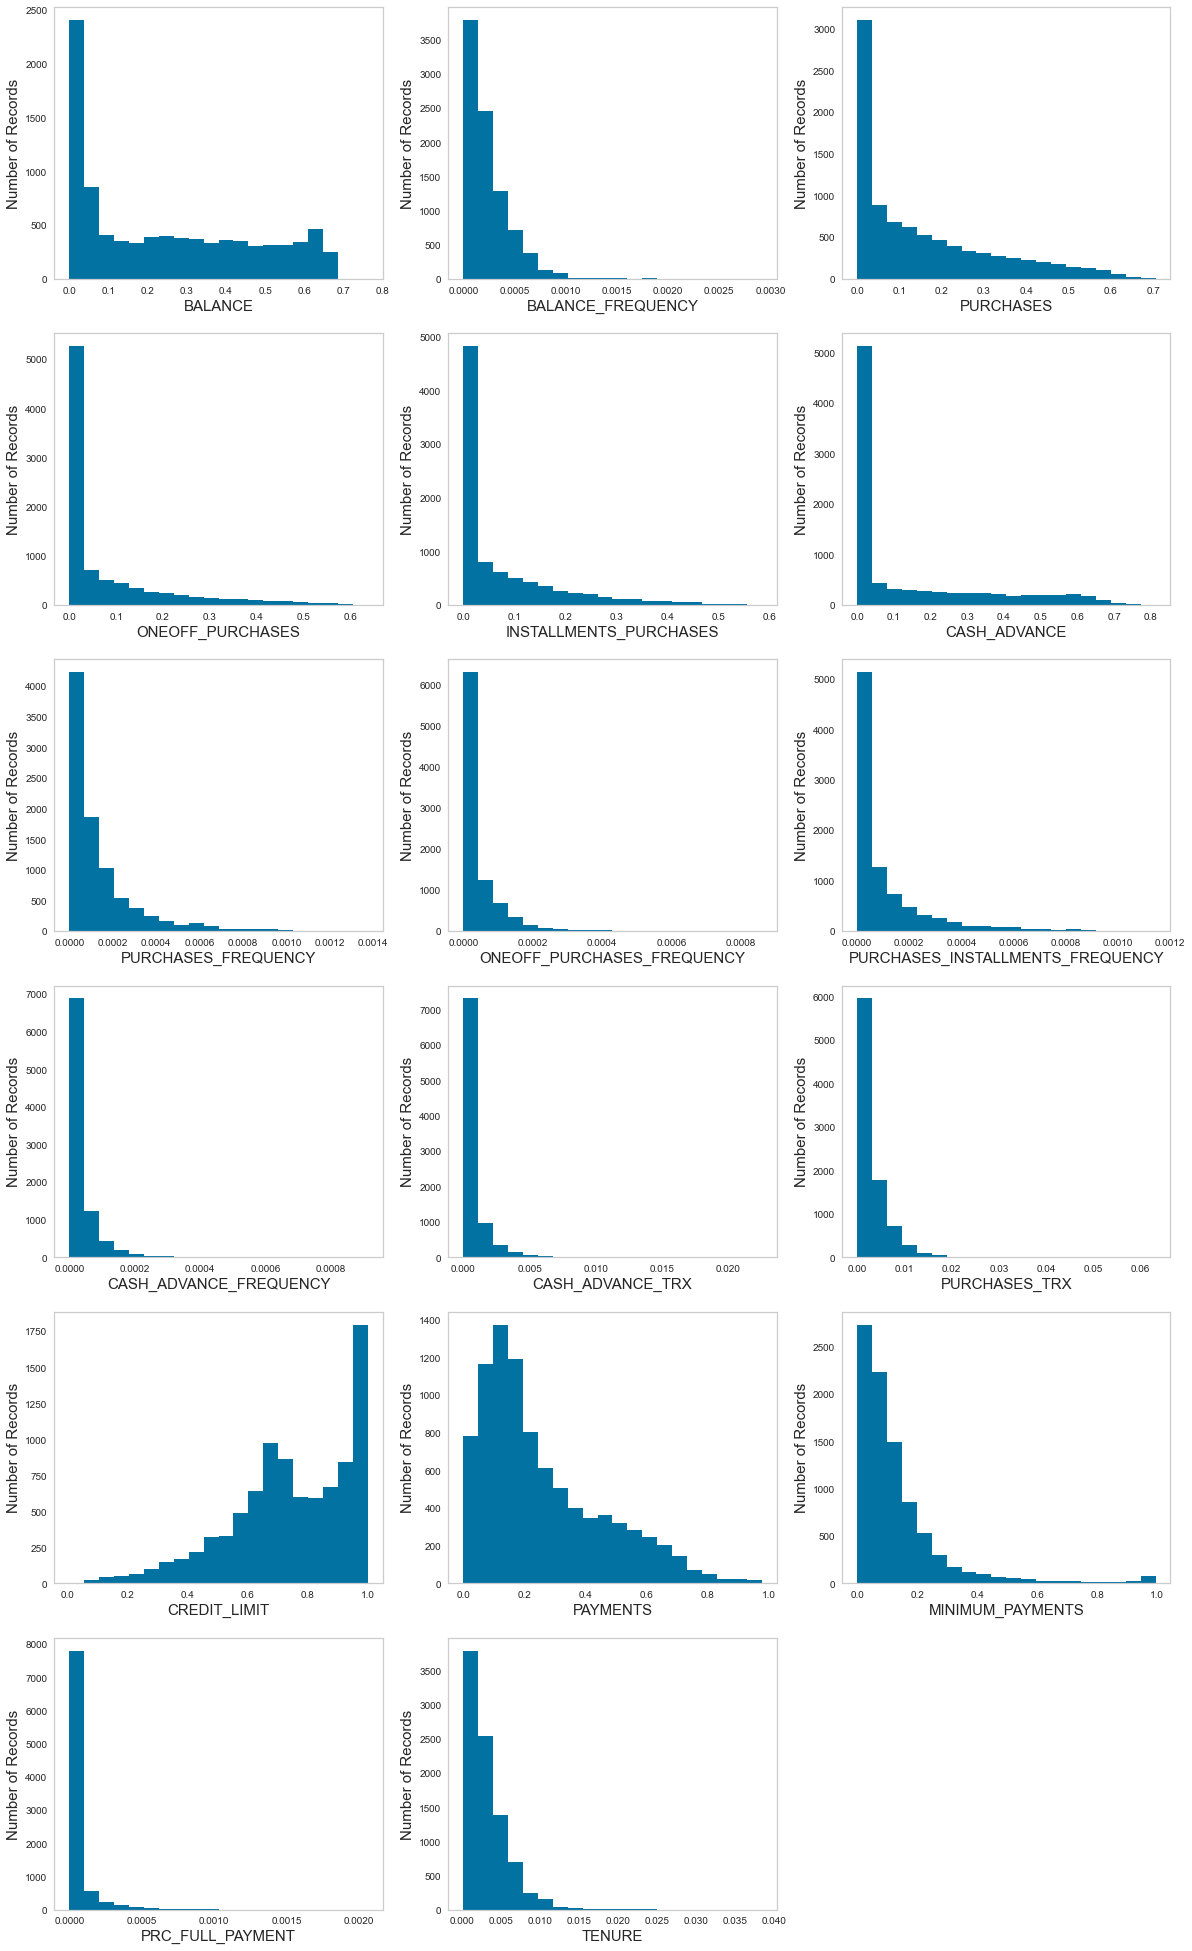

In [104]:
# Histograms to check for normality in the data
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(norm_df.columns):
    ax = plt.subplot(6, 3, i+1)
    plt.hist(norm_df[col], bins=20)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Number of Records", fontsize = 15)
    plt.grid()

### Dimensionality Reduction - PCA
-  PCA helps us to identify and take into account the important features that preserve most of the variance.
-  We will plot the Cummulative expalined variance over number of components to help us decide how many components to consider.

In [105]:
# PCA with normalized data
pca = PCA()
pca.fit(norm_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)
d


5

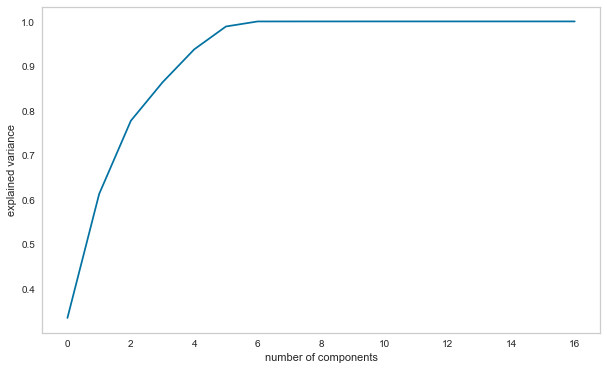

In [106]:
# Plot
plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.grid()

- It is simpler to choose the minimum number of components required to preserve 95% of the variance. Here in this case it is 5. So we will set the number of components to 5 and run pca again.

In [107]:
# set n_components to either d=5 or 0.95
pca = PCA(n_components= d)
X_pca = pca.fit_transform(norm_df)
print(X_pca.shape)

df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

(8950, 5)


PC1       PC2       PC3       PC4       PC5
0 -0.315267 -0.041609  0.027724  0.139935 -0.007226
1  0.318365 -0.161007  0.365700 -0.042647  0.058598
2 -0.207153 -0.180748 -0.127354 -0.067867 -0.067249
3 -0.291843 -0.113087 -0.113674 -0.154760  0.053496
4  0.142319 -0.090890 -0.100240  0.069771 -0.313983

Text(0, 0.5, 'Components')

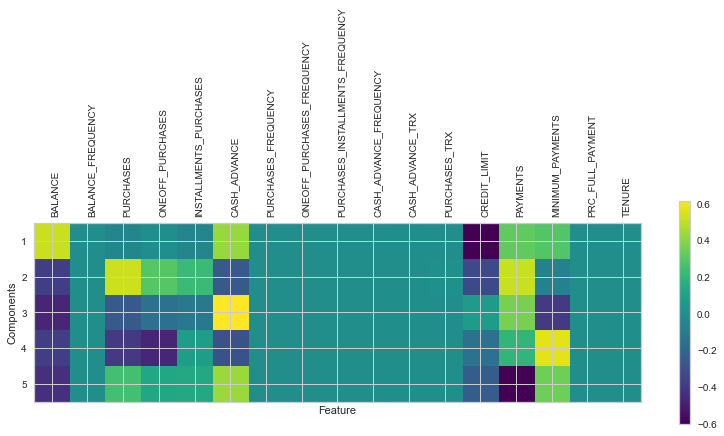

In [108]:
# visualize coefficients using heatmap
plt.matshow(pca.components_, cmap ='viridis')
plt.yticks([0,1,2,3,4],["1","2","3","4","5"])
plt.colorbar()
plt.xticks(range(len(data1.columns)),
          data1.columns, rotation = 90, ha = 'left')
plt.xlabel("Feature")
plt.ylabel("Components")

-  The above heatmap shows which feature is highly correlated(positively or neagatively) with each of the principle components.

## 7. Model - Clustering
-  Here we will use 4 Clustering algorithms on the pca transformed data X_pca.
-  1. K-means
-  2. Hierarchical
-  3. Gaussian mixture models
-  4. DBSCAN

### Evaluation Metrics
-  Since we don't predefined have labels, evaluation must be performed using the model itself. 
-  We will use Silhouette Score, Davies-Bouldin Index and Calinski-Harabasz Index metrics to evaluate the quality of clusters created when using the techniques.
 -  **Interpretation of Silhouette Score :** It ranges from -1 (poor clustering) to +1 (perfect clustering). A score close to 1 suggests well-separated clusters. Scores around zero indicate overlapping clusters.
 -  **Interpretation of Davies-Bouldin Index :** Scores range from 0 and up. Lower numbers suggest better clustering solutions.
 -  **Interpretation of Calinski-Harabasz Index (Variance Ratio Criterion) :** Higher numbers suggest better-defined clusters.

### 1. K-means clustering - a distance-based model
- Requires to specify the number of clusters beforehand.
- There are various methods to find the optimal/best value of k.


In [109]:
# Elbow Method- to find optimal k value
# within cluster sum of squares
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

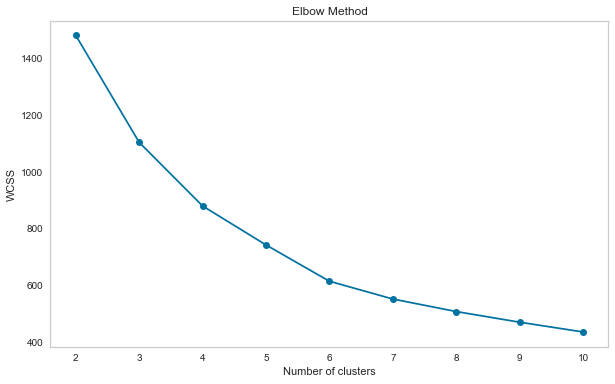

In [110]:
plt.figure(figsize = (10,6))
plt.plot(range(2,11), wcss, marker = "o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

-  The optimal K value is the point at which the graph forms an elbow.
-  We cannot make a clear decision from the elbow plot. So we will calculate silhouette scores and plot the data.

In [111]:
# Silhouette method - a better method compared to the Elbow method
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(X_pca)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_pca, labels, metric = 'euclidean'))

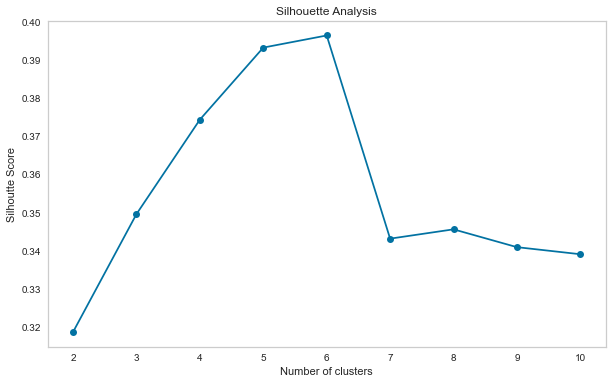

In [112]:
plt.figure(figsize = (10,6))
plt.plot(range(2,11), sil, marker = "o")
plt.title("Silhouette Analysis")
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.show()

-  The Silhouette Score reaches its global maximum at the optimal k.
-  From the above plot we can see that 6 is the optimal number of clusters.

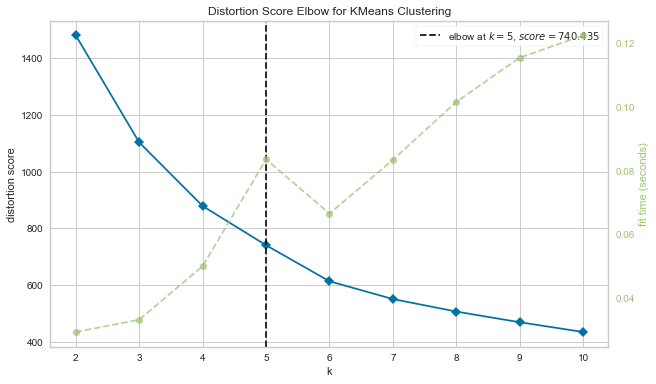

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
# Distortion Score 
plt.figure(figsize = (10,6))
kmeans = KMeans(random_state=0)
vis_elbow = KElbowVisualizer(kmeans, k = (2, 11))
vis_elbow.fit(X_pca)
vis_elbow.poof()

### Discussions
- With distortion score we got k = 5. 
- So we will perform k-means with clusters set to 5 and 6 and see the scores.

In [114]:
# With k = 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X_pca)
labels = kmeans.labels_

# Calculate clustering metrics
si_score = silhouette_score(X_pca,labels )
db_idx = davies_bouldin_score(X_pca,labels)
ch_idx = calinski_harabasz_score(X_pca,labels)

# Print the metrics
print("For k = 5:")
print('Silhouetter Score: %.2f' % si_score)
print('Davies-Bouldin Index: %.2f' % db_idx)
print('Calinski-Harabasz Index: %.2f' % ch_idx)

For k = 5:
Silhouetter Score: 0.39
Davies-Bouldin Index: 1.00
Calinski-Harabasz Index: 4051.75


In [115]:
# With k = 6 clusters
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 1233)
y_kmeans = kmeans.fit_predict(X_pca)
labels = y_kmeans
#kmeans.labels_
#print(np.unique(labels))

# Calculate clustering metrics
si_score = silhouette_score(X_pca,y_kmeans )
db_idx = davies_bouldin_score(X_pca,labels)
ch_idx = calinski_harabasz_score(X_pca,labels)

# Print the metrics
print("For k = 6:")
print('Silhouetter Score: %.2f' % si_score)
print('Davies-Bouldin Index: %.2f' % db_idx)
print('Calinski-Harabasz Index: %.2f' % ch_idx)

For k = 6:
Silhouetter Score: 0.40
Davies-Bouldin Index: 0.95
Calinski-Harabasz Index: 4285.62


- Since the metrics slightly improved for k = 6 clusters, we will stick with 6.

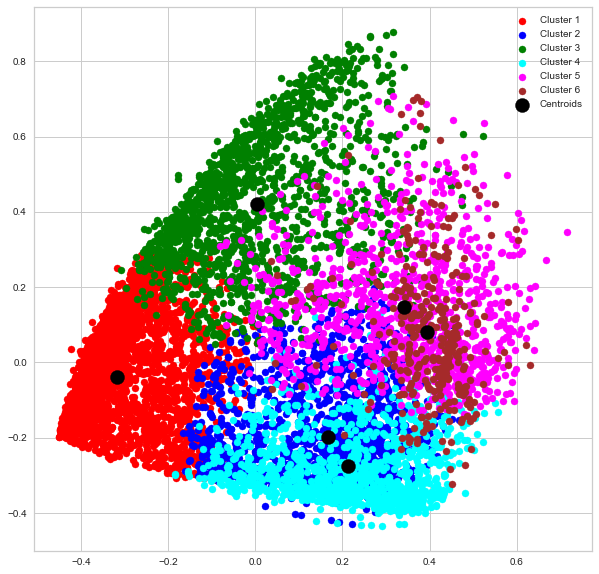

In [116]:
# Scatter plot of data clusters
plt.figure(figsize = (10,10))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_pca[y_kmeans == 4, 0], X_pca[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_pca[y_kmeans == 5, 0], X_pca[y_kmeans == 5, 1], s = 50, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

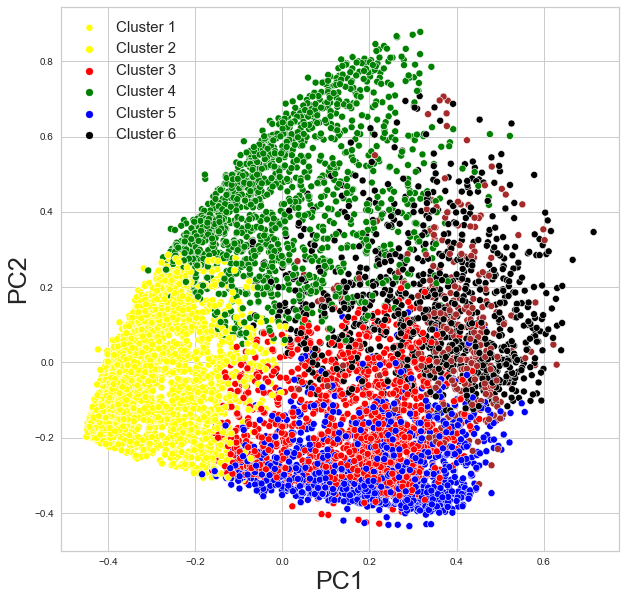

In [117]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = df_pca, x = "PC1", y= "PC2", hue = y_kmeans , palette=['yellow','red','green','blue','black','brown'] )
plt.xlabel("PC1", fontsize = 25)
plt.ylabel("PC2", fontsize = 25)
plt.legend(['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4','Cluster 5','Cluster 6'],fontsize = 15)
plt.show()

In [123]:
Clusters = pd.concat([data1, pd.DataFrame({'Cluster':labels+1})], axis=1)
Clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        4  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        312.343947          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        2

In [124]:
Clusters['Cluster'].value_counts()

1    3221
2    1800
3    1465
4    1132
5     975
6     357
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='count'>

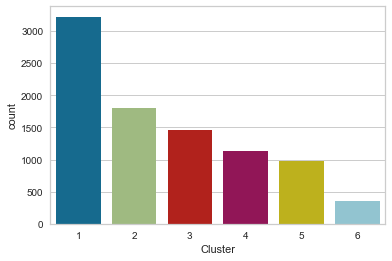

In [125]:
# Visualize the distribution of clusters in the data
sns.countplot(x ='Cluster' , data = Clusters)

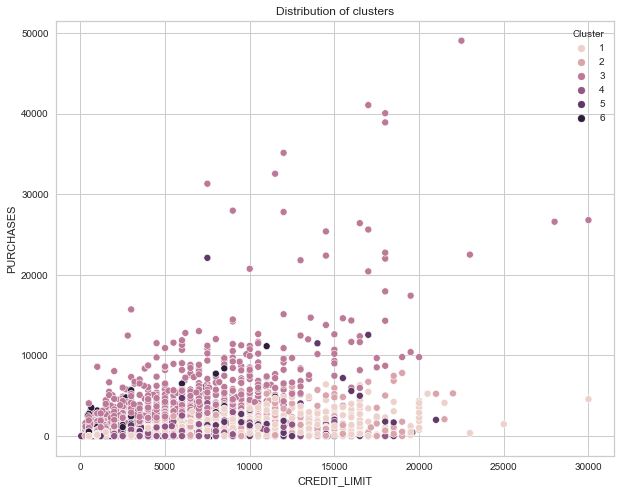

In [129]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=Clusters, x='CREDIT_LIMIT', y='PURCHASES', hue='Cluster')
plt.title('Distribution of clusters')
plt.show()


In [126]:
# 3D Model
import plotly.graph_objects as go

Plot = go.Figure()

for i in list(np.unique(Clusters["Cluster"])):
    Plot.add_trace(go.Scatter3d( x = Clusters[Clusters["Cluster"] == i]["BALANCE"],
                                 y = Clusters[Clusters["Cluster"] == i]["PURCHASES"],
                                 z = Clusters[Clusters["Cluster"] == i]["CREDIT_LIMIT"],
                                mode = 'markers' , marker_size = 5 , marker_line_width = 1,
                                name = str(i)))


Plot.update_traces(hovertemplate = 'BALANCE:%{x} <br>PURCHASES %{y} <br> CREDIT_LIMIT:%{z}')

Plot.update_layout(width= 800 , height = 800 , autosize =True , showlegend =True,
                   scene = dict(xaxis = dict(title = 'BALANCE',titlefont_color = 'black'),
                                yaxis = dict(title = 'PURCHASES',titlefont_color = 'black'),
                                zaxis = dict(title = 'CREDIT_LIMIT',titlefont_color = 'black')),
                   font = dict(family = "Gilroy" , color = 'black', size =12)
                  )


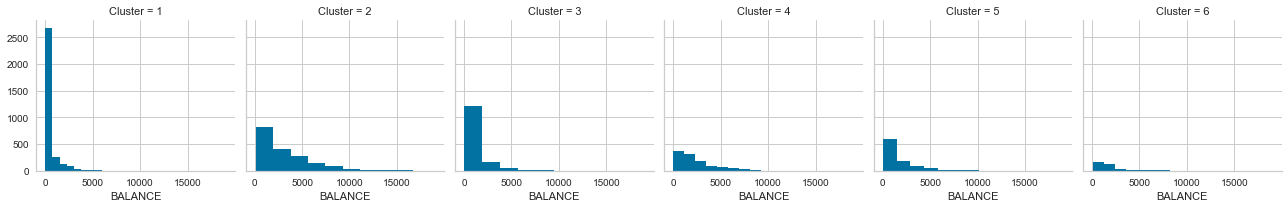

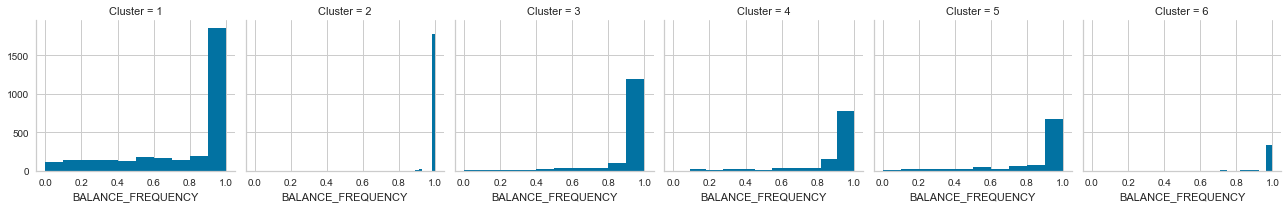

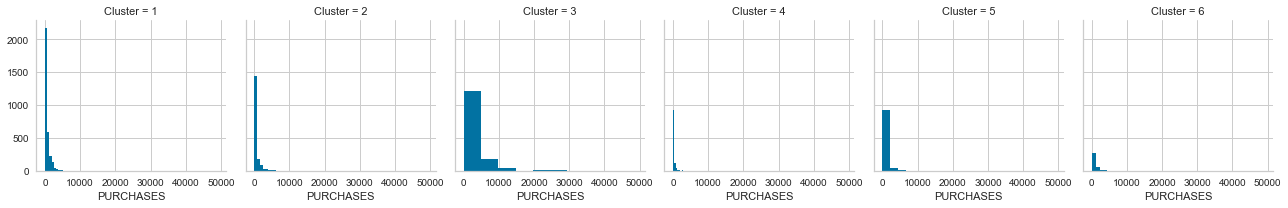

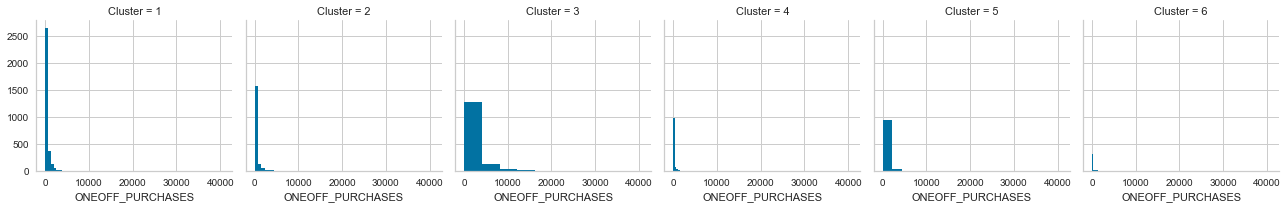

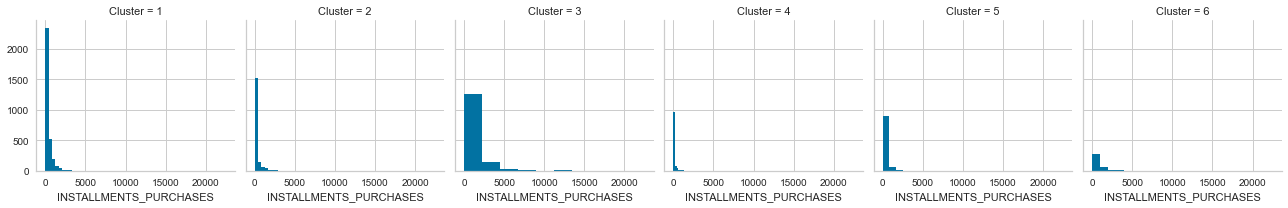

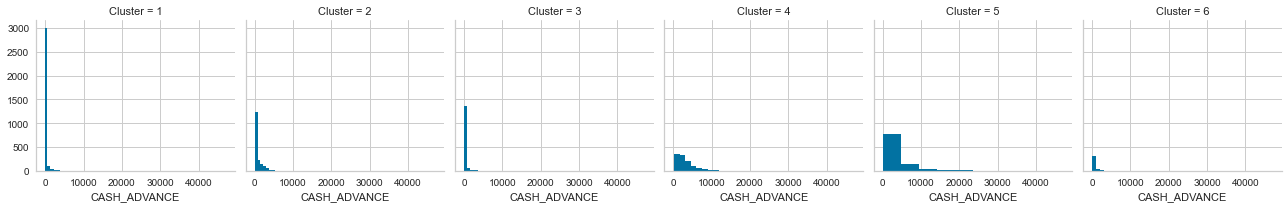

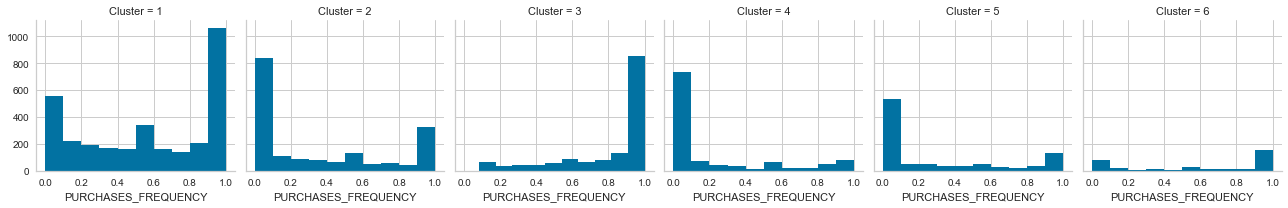

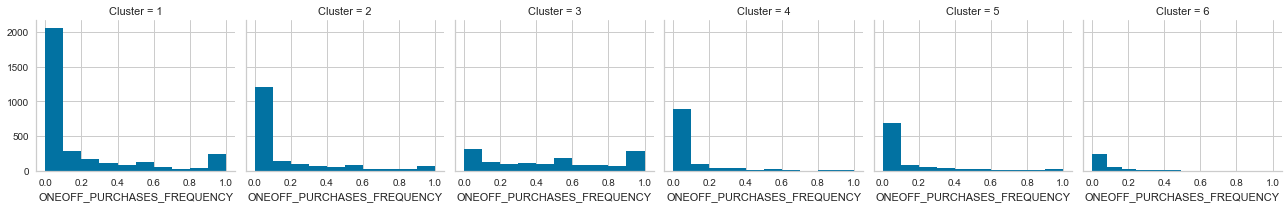

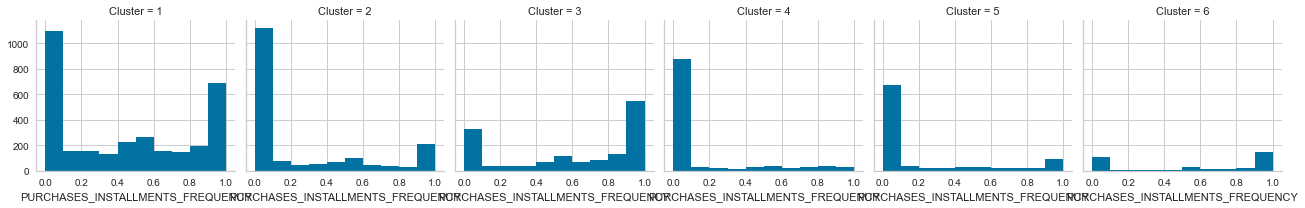

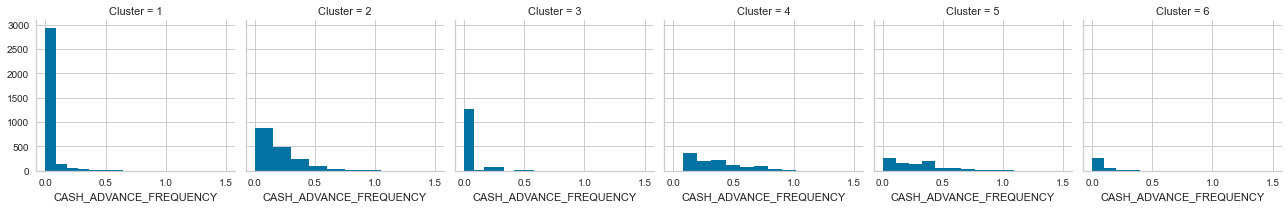

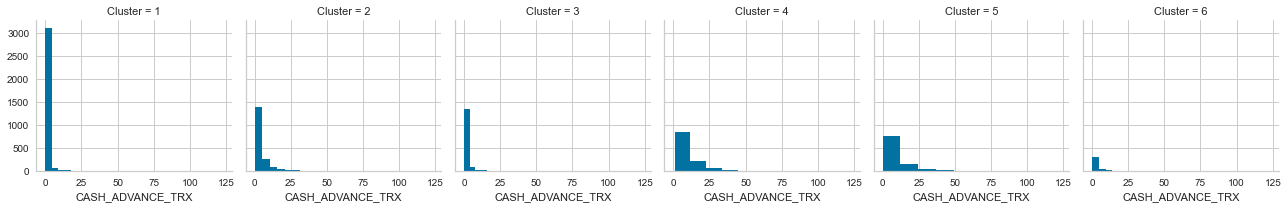

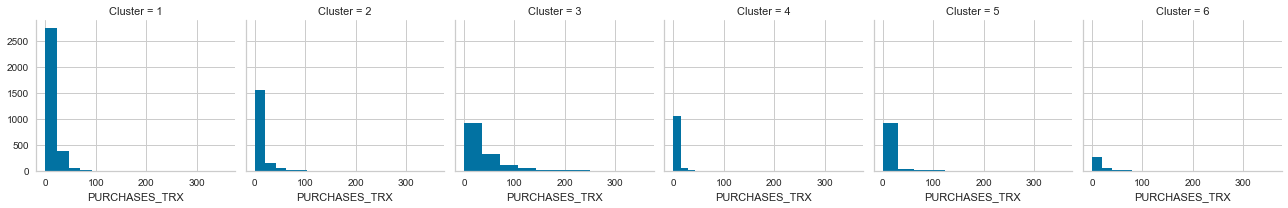

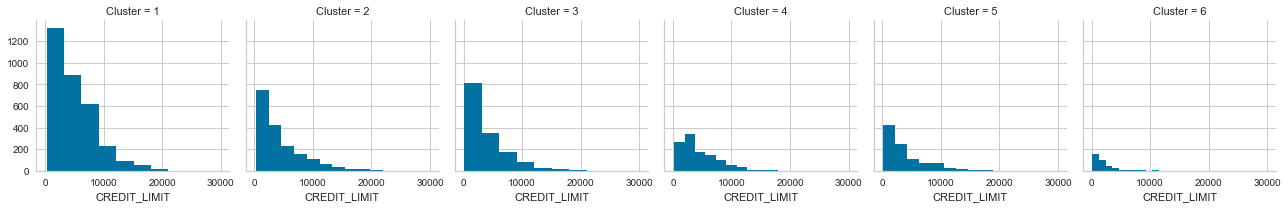

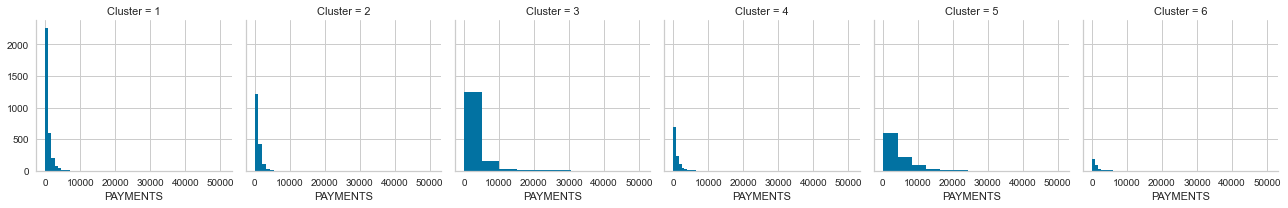

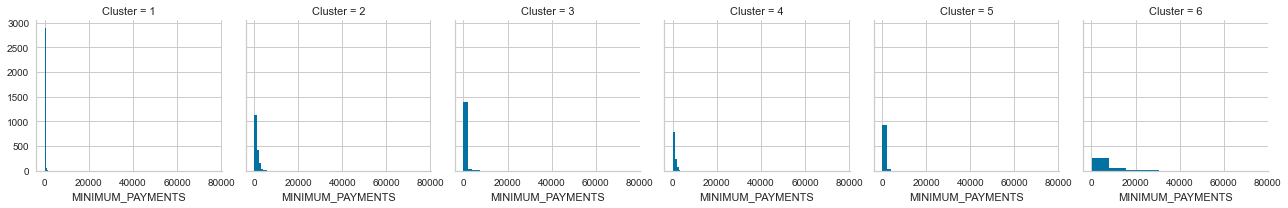

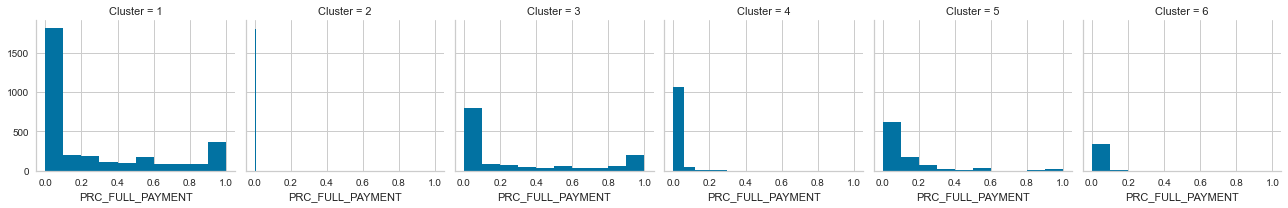

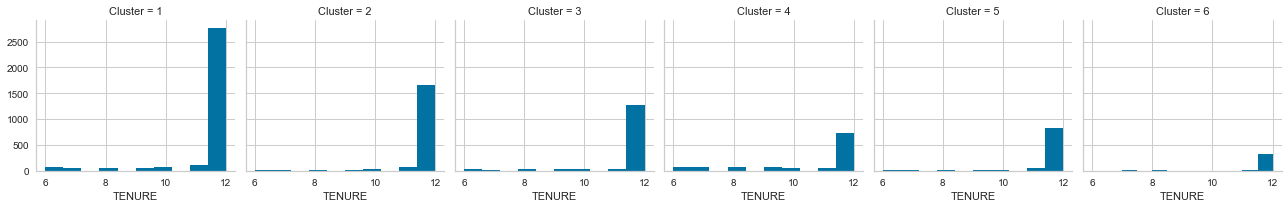

In [127]:
for c in data1:
    grid= sns.FacetGrid(Clusters, col='Cluster')
    grid.map(plt.hist, c)

### 2. Hierarchical - Agglomerative Clustering - Bottom-up merging

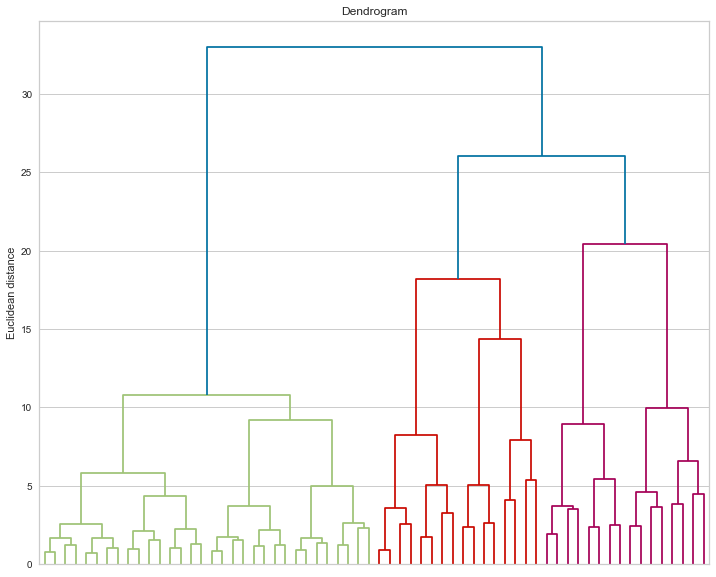

In [41]:
plt.figure(figsize = (12,10))
from scipy.cluster.hierarchy import dendrogram, linkage, ward
hc_cluster = linkage(X_pca, method = 'ward')
#link_array = ward(X_pca)

# plot 
dendrogram(hc_cluster, truncate_mode = 'level', p = 5 , show_leaf_counts = False, no_labels = True )
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

- With the longest vertical distance that doesn't interact with other clusters, we get either 2 or 3 as optimal number of clusters.


- Let's check with 2 and 3 and compare the scores.

In [42]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)
labels = y_hc
#hc.labels_
print(np.unique(labels))

# Calculate clustering metrics
si_score = silhouette_score(X_pca,labels )
db_idx = davies_bouldin_score(X_pca,labels)
ch_idx = calinski_harabasz_score(X_pca,labels)

# Print the metrics
print('Silhouetter Score: %.2f' % si_score)
print('Davies-Bouldin Index: %.2f' % db_idx)
print('Calinski-Harabasz Index: %.2f' % ch_idx)

[0 1 2]
Silhouetter Score: 0.32
Davies-Bouldin Index: 1.46
Calinski-Harabasz Index: 3298.77


-  After checking with 2 and 3 clusters and also checking with other linkage types manually , the scores are shown in the table below.


|Linkage|Clusters|Silhouetter Score|Davies-Bouldin Index|Calinski-Harabasz Index|
   |:-------:|:--------:|:--------:|:--------:|:--------:|
   | ward | 3 | 0.32|  1.46| 3298.77|
   |ward  |2 | 0.27| 1.39|3168.44|
   |average |2| 0.32|1.13 |876.67|
   |complete|4|  0.27|1.14| 1890.11|
   
   
- Model with 3 clusters and linkage = ward  gives better scores.

In [43]:
Clusters_hc = pd.concat([data1, pd.DataFrame({'Cluster':labels+1})], axis=1)
Clusters_hc.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        2  
3     0.000000        312.343947          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        3

<AxesSubplot:xlabel='Cluster', ylabel='count'>

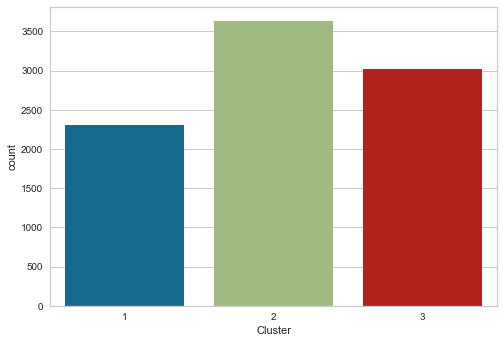

In [44]:
# Visualize the distribution of clusters in the data
sns.countplot(x ='Cluster' , data = Clusters_hc)

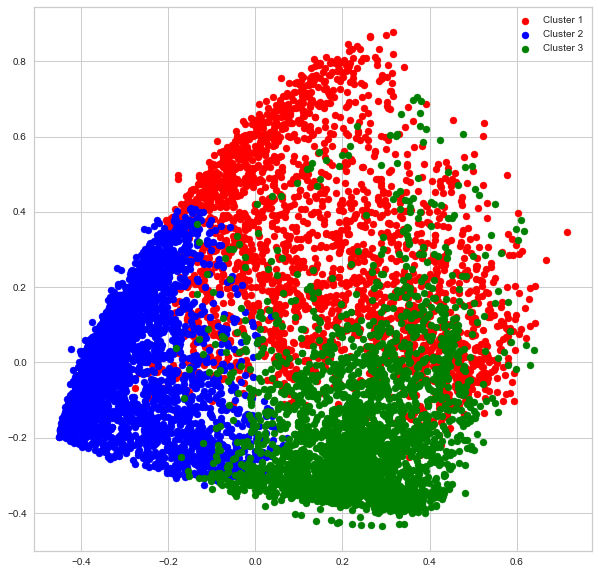

In [45]:
plt.figure(figsize = (10,10))
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

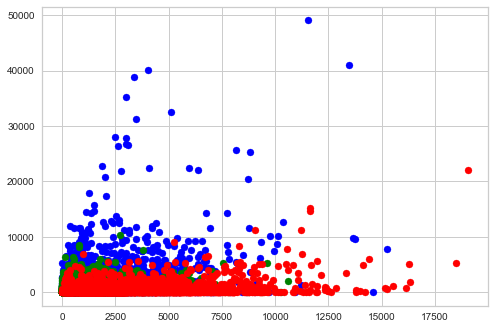

In [46]:
color=['blue','green','red']
for k in range(0,3):
    data = Clusters_hc[Clusters_hc["Cluster"]== k+1]
    plt.scatter(data["BALANCE"],data["PURCHASES"],c=color[k])
plt.show()

In [47]:
# 3D Model
import plotly.graph_objects as go

Plot = go.Figure()

for i in list(np.unique(Clusters_hc["Cluster"])):
    Plot.add_trace(go.Scatter3d( x = Clusters_hc[Clusters_hc["Cluster"] == i]["BALANCE"],
                                 y = Clusters_hc[Clusters_hc["Cluster"] == i]["PURCHASES"],
                                 z = Clusters_hc[Clusters_hc["Cluster"] == i]["CREDIT_LIMIT"],
                                mode = 'markers' , marker_size = 5 , marker_line_width = 1,
                                name = str(i)))


Plot.update_traces(hovertemplate = 'BALANCE:%{x} <br>PURCHASES %{y} <br> CREDIT_LIMIT:%{z}')

Plot.update_layout(width= 800 , height = 800 , autosize =True , showlegend =True,
                   scene = dict(xaxis = dict(title = 'BALANCE',titlefont_color = 'black'),
                                yaxis = dict(title = 'PURCHASES',titlefont_color = 'black'),
                                zaxis = dict(title = 'CREDIT_LIMIT',titlefont_color = 'black')),
                   font = dict(family = "Gilroy" , color = 'black', size =12)
                  )


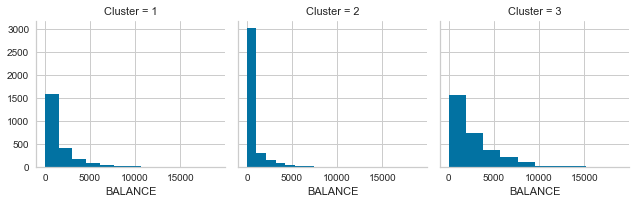

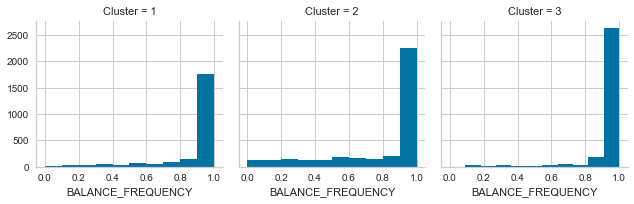

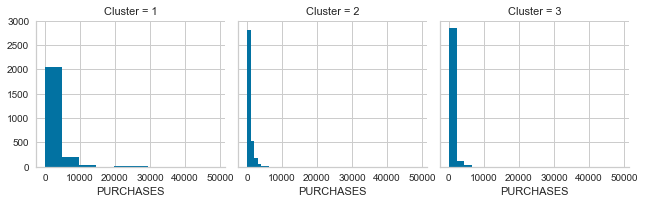

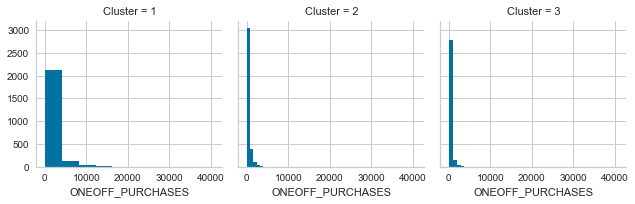

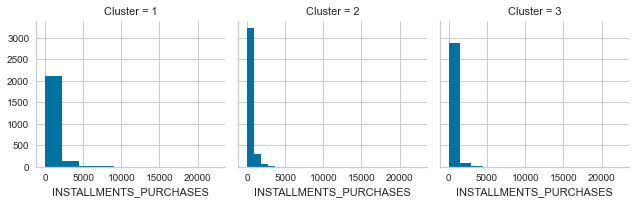

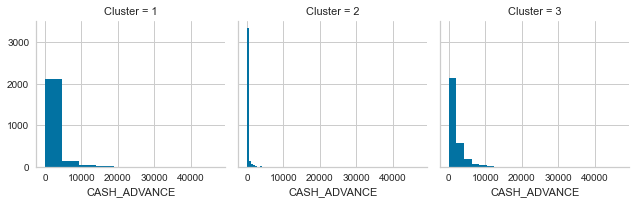

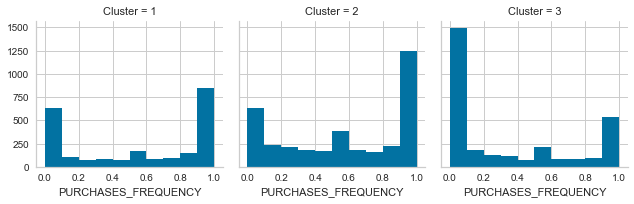

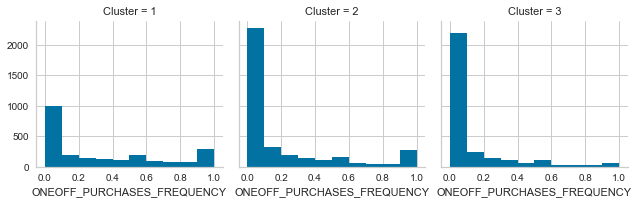

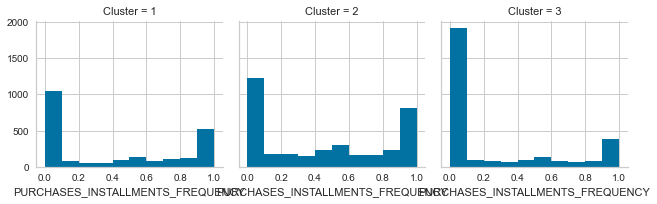

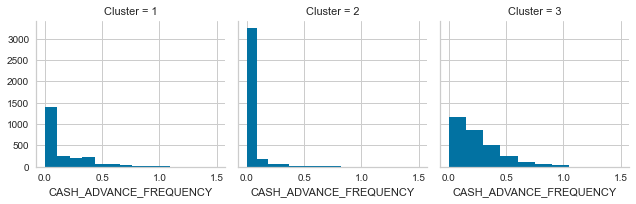

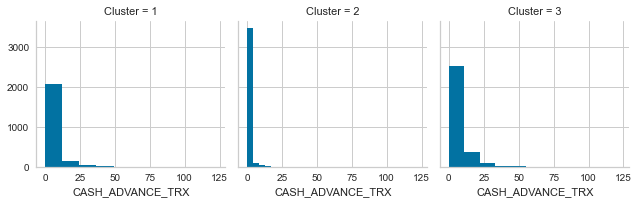

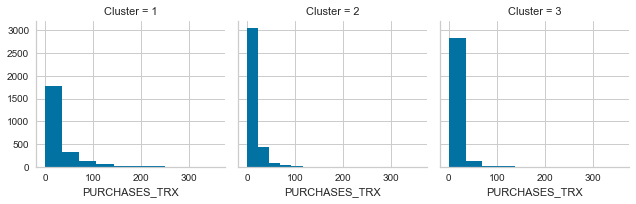

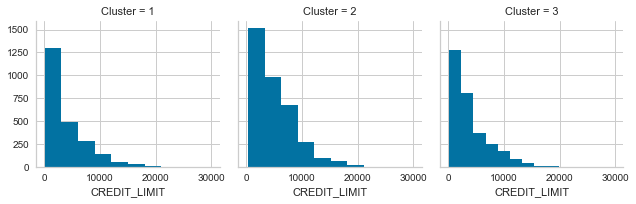

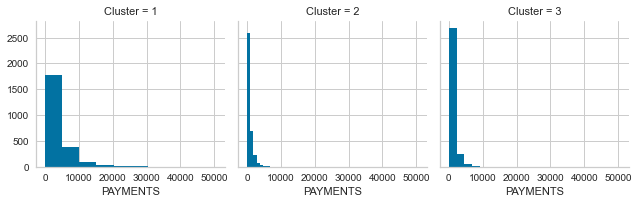

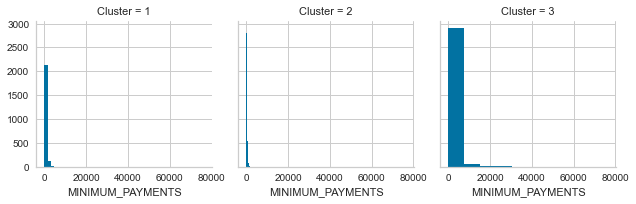

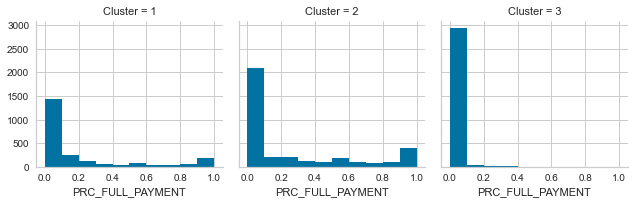

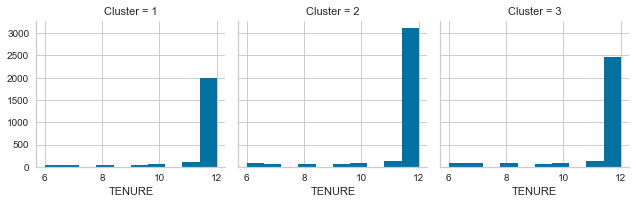

In [48]:
for c in data1:
    grid= sns.FacetGrid(Clusters_hc, col='Cluster')
    grid.map(plt.hist, c)

###  3. Gaussian Mixture Model - a distribution-based model

In [50]:
# Base model 
gmm = GaussianMixture(n_components = 2)
y_gmm = gmm.fit(X_pca)
labels = y_gmm.predict(X_pca)
print(np.unique(labels))
# Calculate clustering metrics
si_score = silhouette_score(X_pca,labels )
db_idx = davies_bouldin_score(X_pca,labels)
ch_idx = calinski_harabasz_score(X_pca,labels)

# Print the metrics
print('Silhouetter Score: %.2f' % si_score)
print('Davies-Bouldin Index: %.2f' % db_idx)
print('Calinski-Harabasz Index: %.2f' % ch_idx)

[0 1]
Silhouetter Score: 0.21
Davies-Bouldin Index: 1.96
Calinski-Harabasz Index: 2144.51


### Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(2,8),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X_pca)


df = pd.DataFrame(grid_search.cv_results_) [
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]

df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head(10)

Number of components Type of covariance    BIC score
6                     2               tied  3946.255139
7                     3               tied  4862.564814
0                     2          spherical  5473.859586
8                     4               tied  5926.217458
9                     5               tied  6094.753082
1                     3          spherical  6218.603517
2                     4          spherical  6795.034808
12                    2               diag  6795.836054
3                     5          spherical  7194.222892
13                    3               diag  7539.995142

-  The best model is the one with lowest BIC value. Here the model with 2 components and 'tied' covariance type has lowest BIC score and is selected by the grid search.

In [52]:
# Best model
gmm = GaussianMixture(n_components = 2, covariance_type = 'tied', random_state=111 )
y_gmm = gmm.fit(X_pca)
labels = y_gmm.predict(X_pca)
print(np.unique(labels))
# Calculate clustering metrics
si_score = silhouette_score(X_pca,labels )
db_idx = davies_bouldin_score(X_pca,labels)
ch_idx = calinski_harabasz_score(X_pca,labels)

# Print the metrics
print('Silhouetter Score: %.2f' % si_score)
print('Davies-Bouldin Index: %.2f' % db_idx)
print('Calinski-Harabasz Index: %.2f' % ch_idx)


[0 1]
Silhouetter Score: 0.32
Davies-Bouldin Index: 1.45
Calinski-Harabasz Index: 3590.62


In [53]:
Clusters_gmm = pd.concat([data1, pd.DataFrame({'Cluster':labels+1})], axis=1)
Clusters_gmm.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        312.343947          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        2

<AxesSubplot:xlabel='Cluster', ylabel='count'>

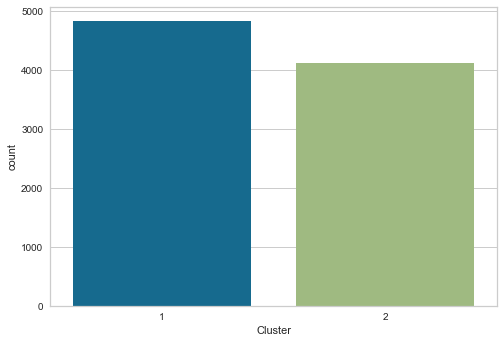

In [54]:
# Visualize the distribution of clusters in the data
sns.countplot(x ='Cluster' , data = Clusters_gmm)

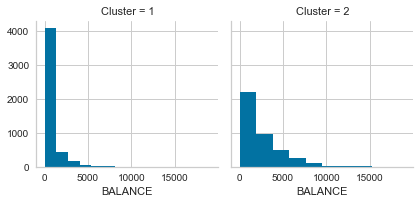

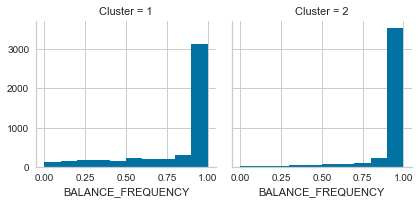

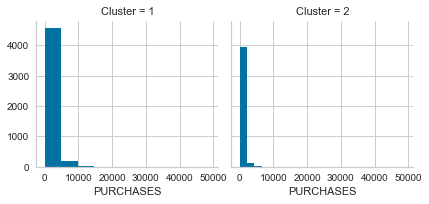

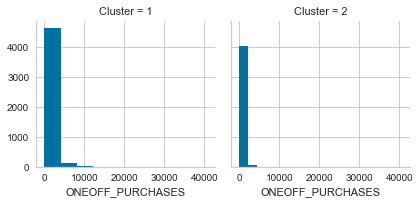

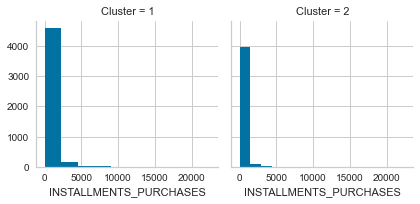

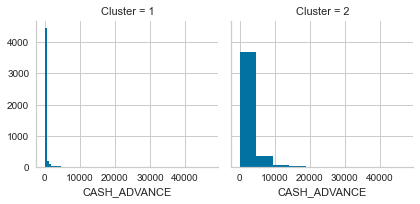

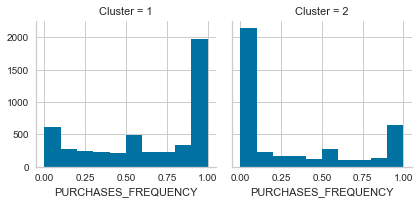

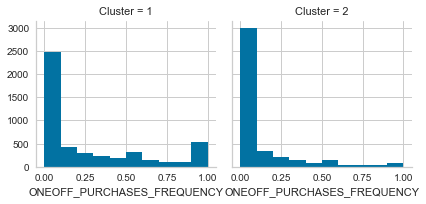

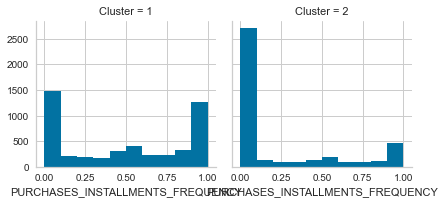

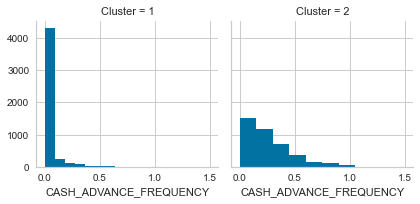

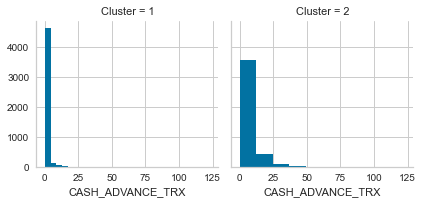

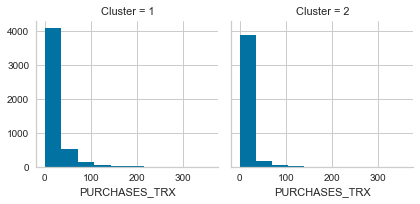

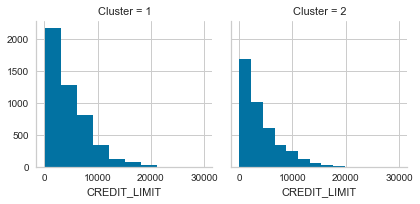

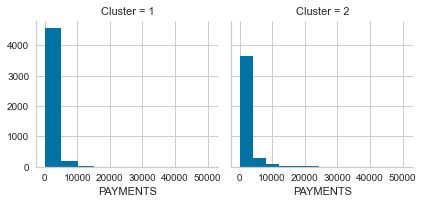

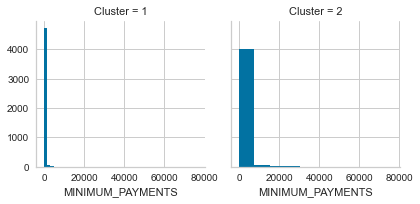

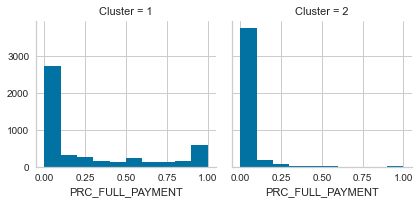

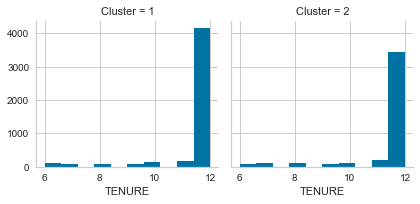

In [55]:
for c in data1:
    grid= sns.FacetGrid(Clusters_gmm, col='Cluster')
    grid.map(plt.hist, c)

In [56]:
# 3D Model
import plotly.graph_objects as go

Plot = go.Figure()

for i in list(np.unique(Clusters_gmm["Cluster"])):
    Plot.add_trace(go.Scatter3d( x = Clusters_gmm[Clusters_gmm["Cluster"] == i]["BALANCE"],
                                 y = Clusters_gmm[Clusters_gmm["Cluster"] == i]["PURCHASES"],
                                 z = Clusters_gmm[Clusters_gmm["Cluster"] == i]["CREDIT_LIMIT"],
                                mode = 'markers' , marker_size = 5 , marker_line_width = 1,
                                name = str(i)))


Plot.update_traces(hovertemplate = 'BALANCE:%{x} <br>PURCHASES %{y} <br> CREDIT_LIMIT:%{z}')

Plot.update_layout(width= 800 , height = 800 , autosize =True , showlegend =True,
                   scene = dict(xaxis = dict(title = 'BALANCE',titlefont_color = 'black'),
                                yaxis = dict(title = 'PURCHASES',titlefont_color = 'black'),
                                zaxis = dict(title = 'CREDIT_LIMIT',titlefont_color = 'black')),
                   font = dict(family = "Gilroy" , color = 'black', size =12)
                  )

## 4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [61]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=40)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

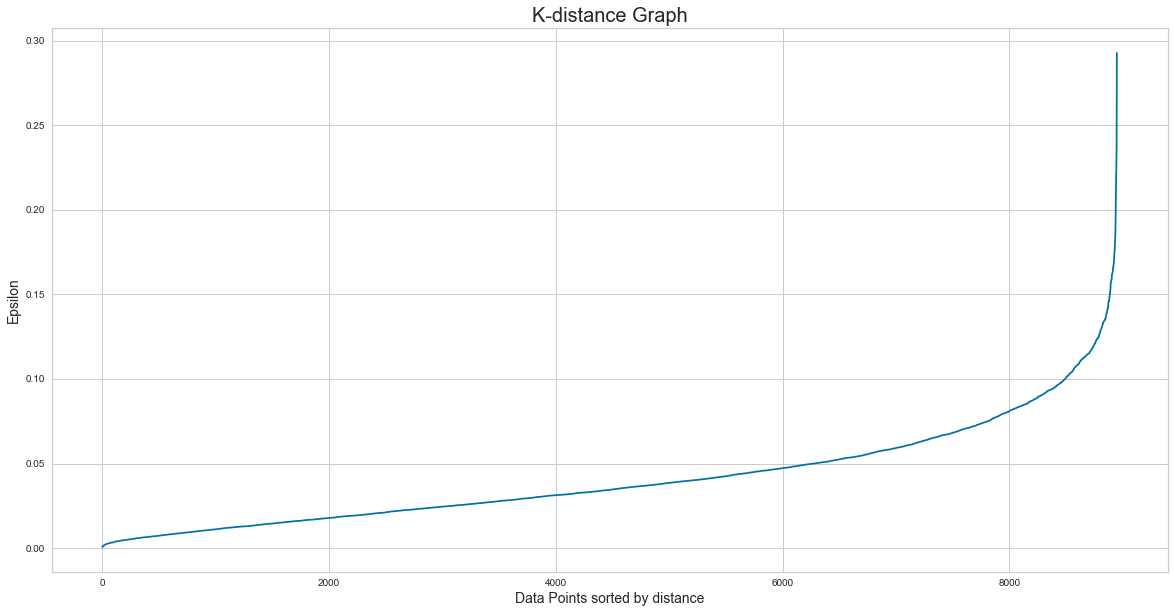

In [62]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

-  The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph

### Hyperparameter tuning DBSCAN

In [65]:
# Define a range of `eps` and `min_samples` values to try

# the maximum distance two points can be from one another while still belonging to the same cluster
eps_values = [0.12,0.13]

# the fewest number of points required to form a cluster
# MinPts = 2*dim, where dim= the dimensions of your data set 
min_samples = [40,50,100,200,400,500]

# Perform DBSCAN clustering with different combinations of `eps` and `min_samples`
num_clusters=[]
epsilon_values=[]
min_samples_values =[]
si_values=[]
db_values=[]
ch_values=[]
ari_values=[]

for i, eps in enumerate(eps_values):
    for j, min_samp in enumerate(min_samples):
       # print(eps,"&",min_samp)
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        dbscan_labels = dbscan.fit_predict(X_pca)
       
        # Number of clusters in labels
        n_clusters_ = len(np.unique(dbscan_labels)) 
        #- (1 if -1 in dbscan_labels else 0) #, ignoring noise if present

        # Calculate the silhouette score and adjusted Rand Index (ARI) score
        si_score = silhouette_score(X_pca,dbscan_labels )
        db_idx = davies_bouldin_score(X_pca,dbscan_labels)
        ch_idx = calinski_harabasz_score(X_pca,dbscan_labels)
        
        # Append the values
        num_clusters.append(n_clusters_)
        epsilon_values.append(eps)
        min_samples_values.append(min_samp)
        si_values.append(si_score)
        db_values.append(db_idx)
        ch_values.append(ch_idx)
       
        
        # Create a Dataframe       
        metrics_df=pd.DataFrame({
            'Clusters': num_clusters,
            'Epsilon' : epsilon_values,
            'Min_samples': min_samples_values,
            'SI_Score': np.round(si_values,2),
            'DB_Score': np.round(db_values,2),
            'CH_Score': np.round(ch_values,2),            
            })
           

            

In [67]:
metrics_df.sort_values(by = 'SI_Score', ascending=False)

Clusters  Epsilon  Min_samples  SI_Score  DB_Score  CH_Score
11         2     0.13          500      0.21      1.18   2423.37
8          2     0.13          100      0.20      2.25   1611.08
9          3     0.13          200      0.20      1.46   2110.25
2          2     0.12          100      0.19      2.23   1653.39
5          2     0.12          500      0.19      1.17   2275.76
6          3     0.13           40      0.18      1.84    706.03
3          3     0.12          200      0.17      1.42   1947.48
7          4     0.13           50      0.14      1.67    745.42
10         3     0.13          400      0.14      1.30   1724.66
0          5     0.12           40      0.12      1.58    564.22
1          4     0.12           50      0.11      1.68    689.15
4          3     0.12          400      0.10      1.24   1550.43

In [68]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.13, min_samples=500)
labels = dbscan.fit_predict(X_pca)
print(np.unique(labels))
# Calculate the silhouette score and adjusted Rand Index (ARI) score
si_score = silhouette_score(X_pca,labels )
db_idx = davies_bouldin_score(X_pca,labels)
ch_idx = calinski_harabasz_score(X_pca,labels)
# Print the metrics
print('Silhouetter Score: %.2f' % si_score)
print('Davies-Bouldin Index: %.2f' % db_idx)
print('Calinski-Harabasz Index: %.2f' % ch_idx)


[-1  0]
Silhouetter Score: 0.21
Davies-Bouldin Index: 1.18
Calinski-Harabasz Index: 2423.37


In [69]:
Clusters_db = pd.concat([data1, pd.DataFrame({'Cluster':labels+2})], axis=1)
Clusters_db.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        312.343947          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

<AxesSubplot:xlabel='Cluster', ylabel='count'>

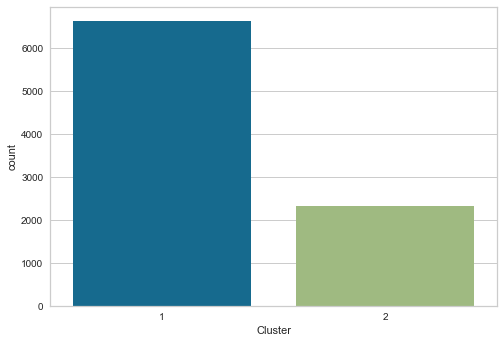

In [70]:
# Visualize the distribution of clusters in the data
sns.countplot(x ='Cluster' , data = Clusters_db)

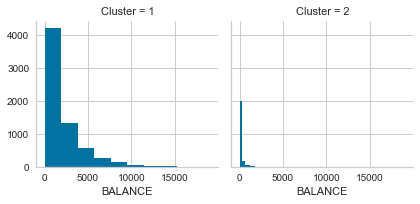

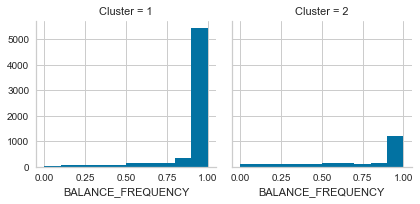

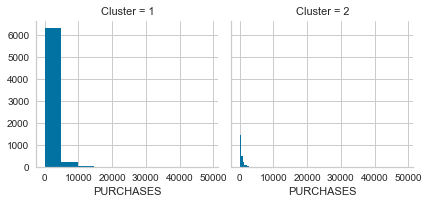

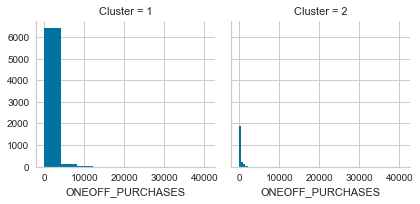

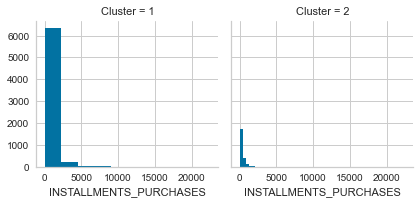

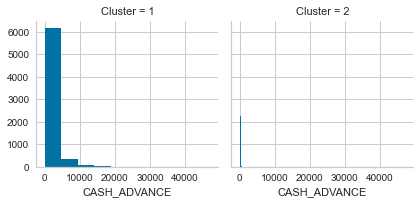

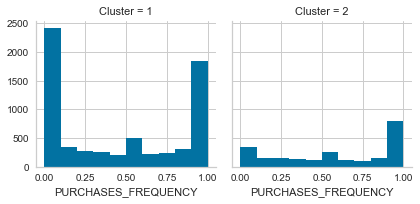

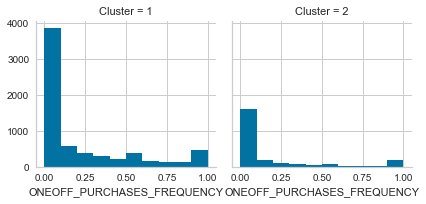

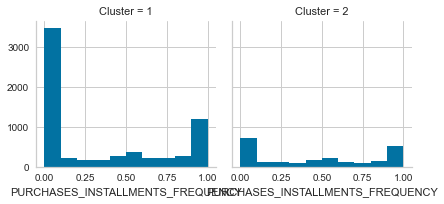

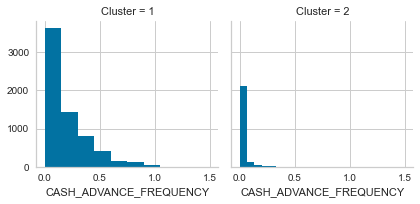

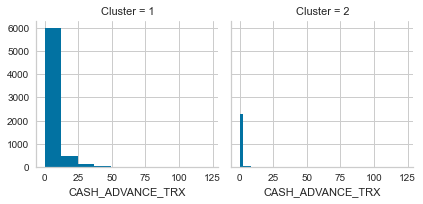

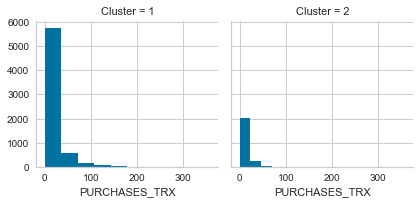

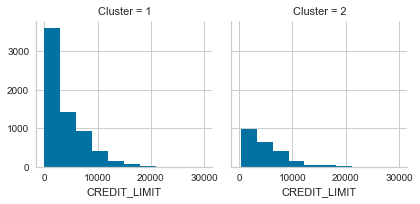

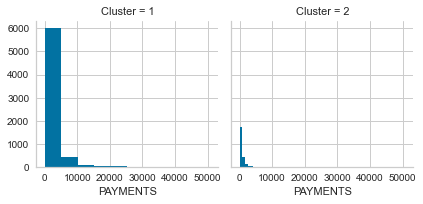

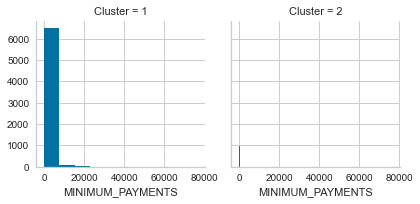

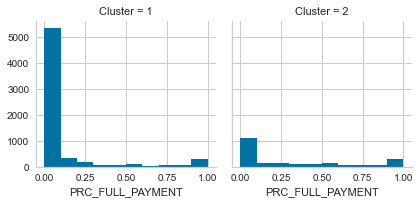

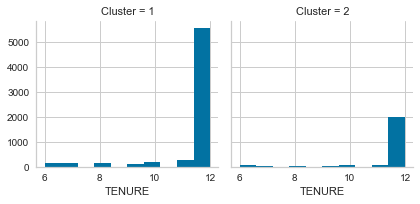

In [71]:
for c in data1:
    grid= sns.FacetGrid(Clusters_db, col='Cluster')
    grid.map(plt.hist, c)

In [72]:
# 3D Model
import plotly.graph_objects as go

Plot = go.Figure()

for i in list(np.unique(Clusters_hc["Cluster"])):
    Plot.add_trace(go.Scatter3d( x = Clusters_db[Clusters_db["Cluster"] == i]["BALANCE"],
                                 y = Clusters_db[Clusters_db["Cluster"] == i]["PURCHASES"],
                                 z = Clusters_db[Clusters_db["Cluster"] == i]["CREDIT_LIMIT"],
                                mode = 'markers' , marker_size = 5 , marker_line_width = 1,
                                name = str(i)))


Plot.update_traces(hovertemplate = 'BALANCE:%{x} <br>PURCHASES %{y} <br> CREDIT_LIMIT:%{z}')

Plot.update_layout(width= 800 , height = 800 , autosize =True , showlegend =True,
                   scene = dict(xaxis = dict(title = 'BALANCE',titlefont_color = 'black'),
                                yaxis = dict(title = 'PURCHASES',titlefont_color = 'black'),
                                zaxis = dict(title = 'CREDIT_LIMIT',titlefont_color = 'black')),
                   font = dict(family = "Gilroy" , color = 'black', size =12)
                  )

## 8. Results and Analysis

- Silhouette scores close to 1 is a good score.
- Low Davies-Bouldin scores are better.
- High Calinski-Harabasz Index scores are good.


                                       
   |Algorithm|Clusters|Silhouette Score|Davies-Bouldin Index|Calinski-Harabasz Index|
   |:-------:|:--------:|:--------:|:--------:|:--------:|
   | K-means Clustering|6| 0.40| 0.95| 4285.62|
   |Hierarchical Clustering | 3|0.32| 1.46|3298.77|
   |Gaussian Mixture model| 2|0.32| 1.45|3590.62|
   |DBSCAN |2|0.21| 1.18|2423.37|

- From the table of results, k-means is the best clustering algorithm for our credit card customer data segmentation task.

## 9. Discussions and Conclusions
-  Credit-card Customer dataset is analyzed and modeled with 4 different clustering algorithms.
-  Scaling and PCA analysis is done before modeling.
-  Each technique divided the data into different clusters.
-  DBSCAN requires domain knowledge in specifying minpoints. Small variation in epsilon and minpoints can give varying results. It is highly sensitive t these 2 points.
-  Overall K-means clustering algorithm generated good scores with 6 clusters.

- Ways to Improve
 -  Much better and recent version of HDBSCAN( Hierarchical Clustering combined with regular DBSCAN) exists which is faster and saccurate than DBSCAN 

### GitHub Repository Link
https://github.com/ShravaniNK/MachineLearning/blob/main/Customer_Segmentation